In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 12.0)
import seaborn as sns
from scipy import stats
import numpy as np
import sklearn
import statsmodels.api as sm
import time

# Initial Analysis

In [2]:
df = pd.read_csv('housing.csv')
df

,crime_rate,avg_number_of_rooms,distance_to_employment_centers,property_tax_rate,pupil_teacher_ratio,house_value
0,0.02731,6.421,4.9671,242.0,17.8,21.6
1,0.02729,7.185,4.9671,242.0,17.8,34.7
2,0.03237,6.998,6.0622,222.0,18.7,33.4
3,0.06905,7.147,6.0622,222.0,18.7,36.2
4,0.02985,6.430,6.0622,222.0,18.7,28.7
5,0.08829,6.012,5.5605,311.0,15.2,22.9
6,0.14455,6.172,5.9505,311.0,15.2,27.1
7,0.21124,5.631,6.0821,311.0,15.2,16.5
8,0.17004,6.004,6.5921,311.0,15.2,18.9
9,0.22489,6.377,6.3467,311.0,15.2,15.0


In [3]:
# NA aggregation
df_na = df.isna().sum()
df_na

crime_rate                        0
avg_number_of_rooms               0
distance_to_employment_centers    0
property_tax_rate                 0
pupil_teacher_ratio               0
house_value                       0
dtype: int64

No missing values indicated

## Response variable

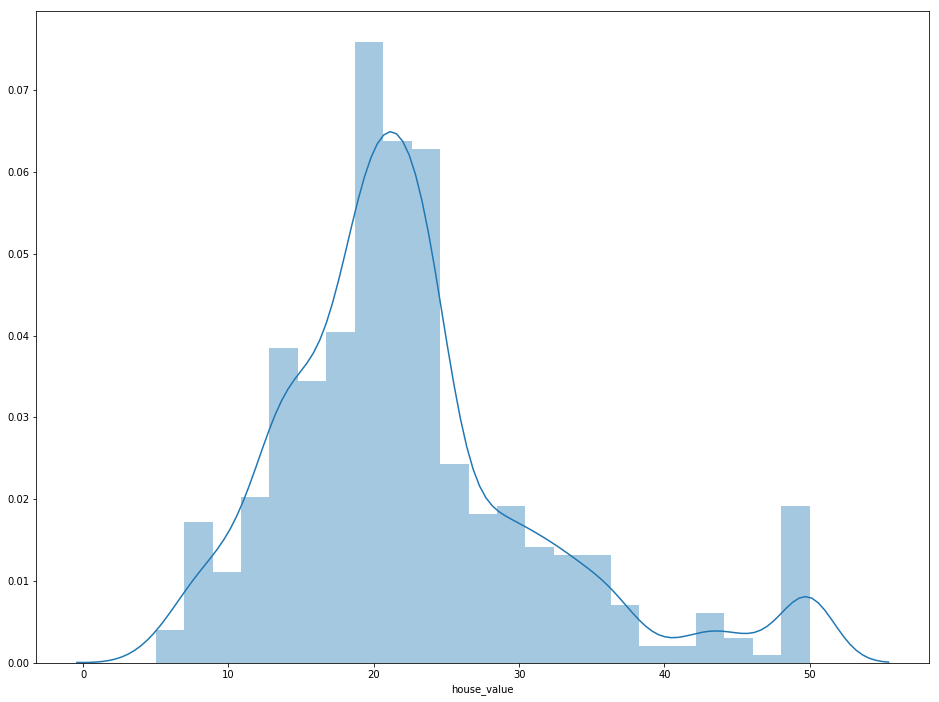

In [4]:
plt.figure(figsize=(16,12))
sns.distplot(df['house_value'])

Large cluster of values seems to exist on the right-hand side, perhaps indicative of a ceiling value?

In [5]:
df['house_value'].describe()

count    505.000000
mean      22.529901
std        9.205991
min        5.000000
25%       17.000000
50%       21.200000
75%       25.000000
max       50.000000
Name: house_value, dtype: float64

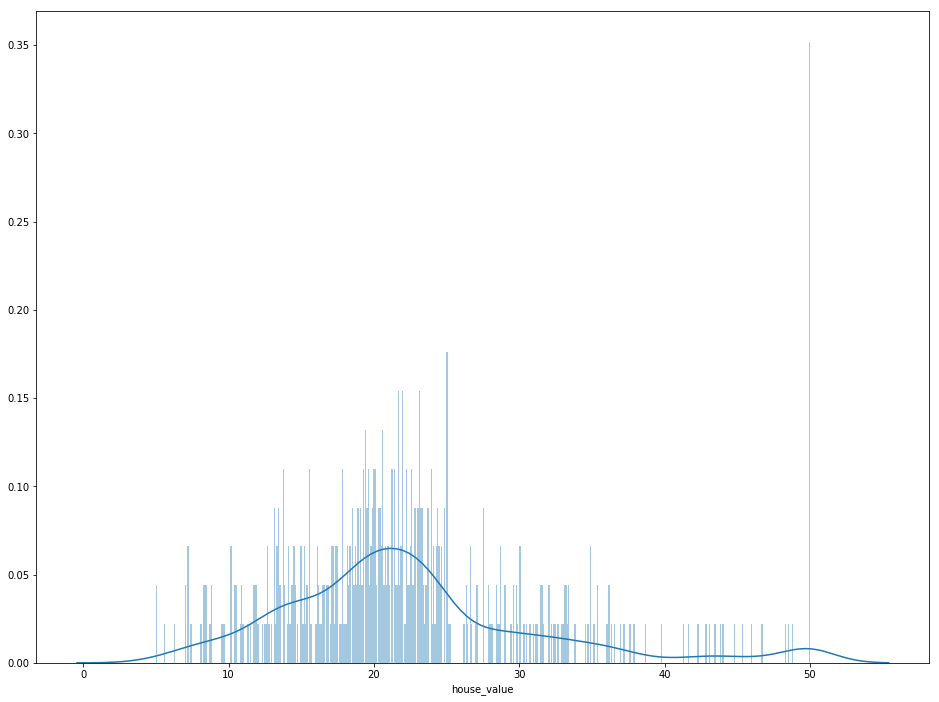

In [6]:
plt.figure(figsize=(16,12))
sns.distplot(df['house_value'], bins=500) # Value range of 0-50, 1 decimal place

In [7]:
stats.skew(df['house_value'])

1.1047418486975273

Positive skew exists, perhaps influenced by the high number of records at the maximum value. Depending on how the data was collected, it might be the case that there exist plenty of values higher than the maximum value, but are recorded only as the maximum value. Otherwise, shape appears roughly normal.

## Predictor variables

### Crime rate

In [8]:
df['crime_rate'].describe()

count    505.000000
mean       3.620667
std        8.608572
min        0.009060
25%        0.082210
50%        0.259150
75%        3.678220
max       88.976200
Name: crime_rate, dtype: float64

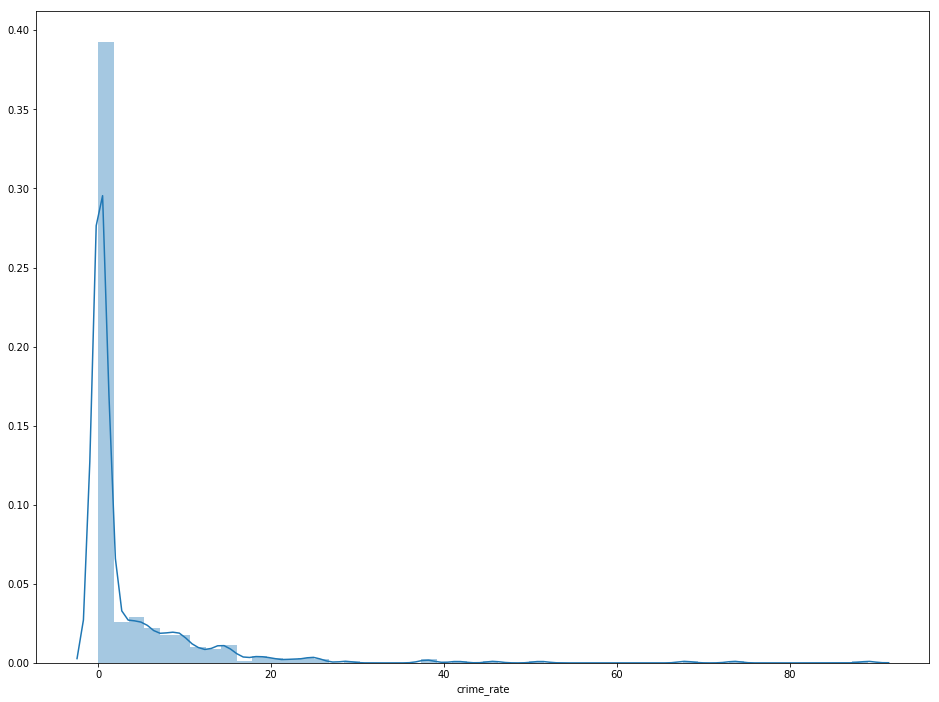

In [9]:
plt.figure(figsize=(16,12))
sns.distplot(df['crime_rate'])

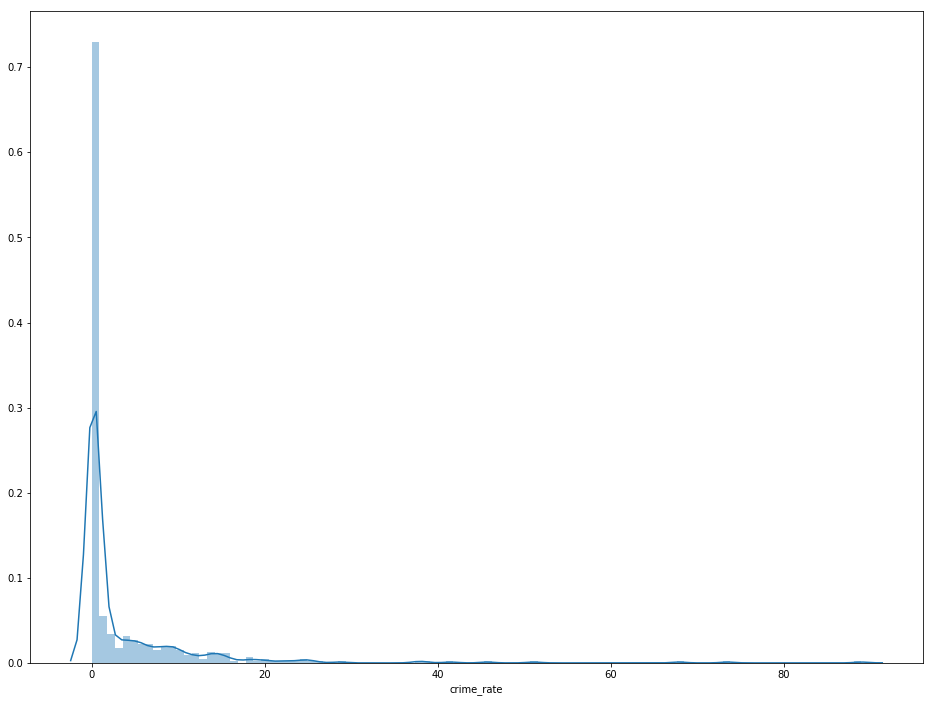

In [10]:
plt.figure(figsize=(16,12))
sns.distplot(df['crime_rate'], bins=100)

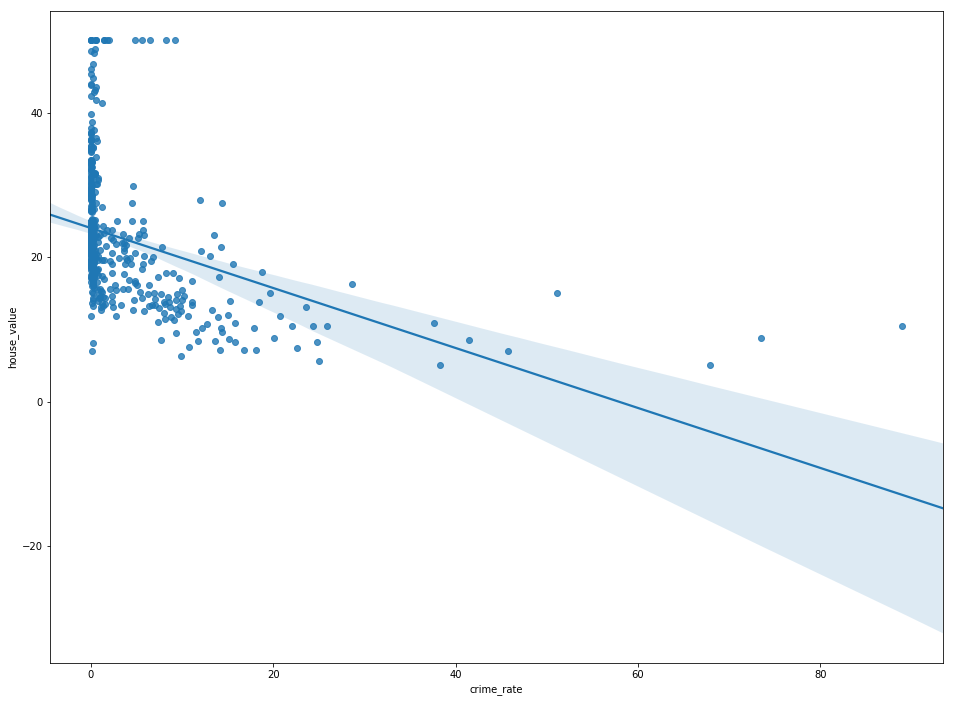

In [11]:
plt.figure(figsize=(16,12))
sns.regplot(x=df['crime_rate'], y=df['house_value'], fit_reg=True)

Values appear to cluster around zero, with a zero lower bound. Shape seems to suggest an exponential (or similar) distribution, especially given that it is a rate, and therefore a transformation for linear regression may add value.

Clustering around zero is unsurprising, since not all neighbourhoods will have high crime rates, and those that do will have lower house prices (where such a pattern may exist). A few isolated districts at the top seem to have high crime and yet high property value - these may be popular districts, where the opportunity for crime is much higher, yet the districts retain their pulling power because of the location, e.g. places with active nightlife.

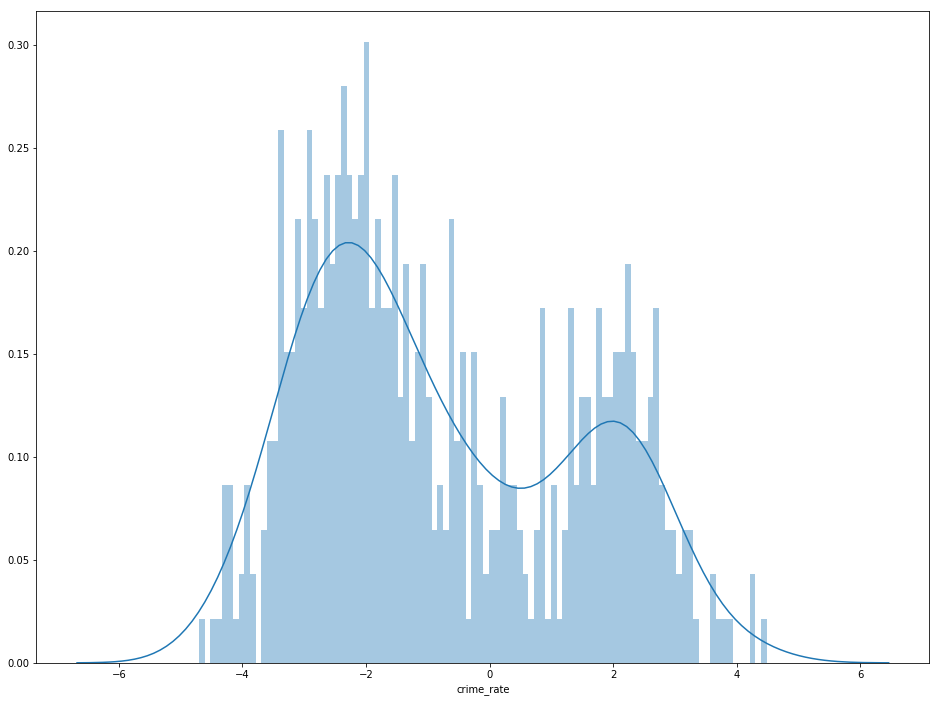

In [12]:
plt.figure(figsize=(16,12))
sns.distplot(np.log(df['crime_rate']), bins=100)

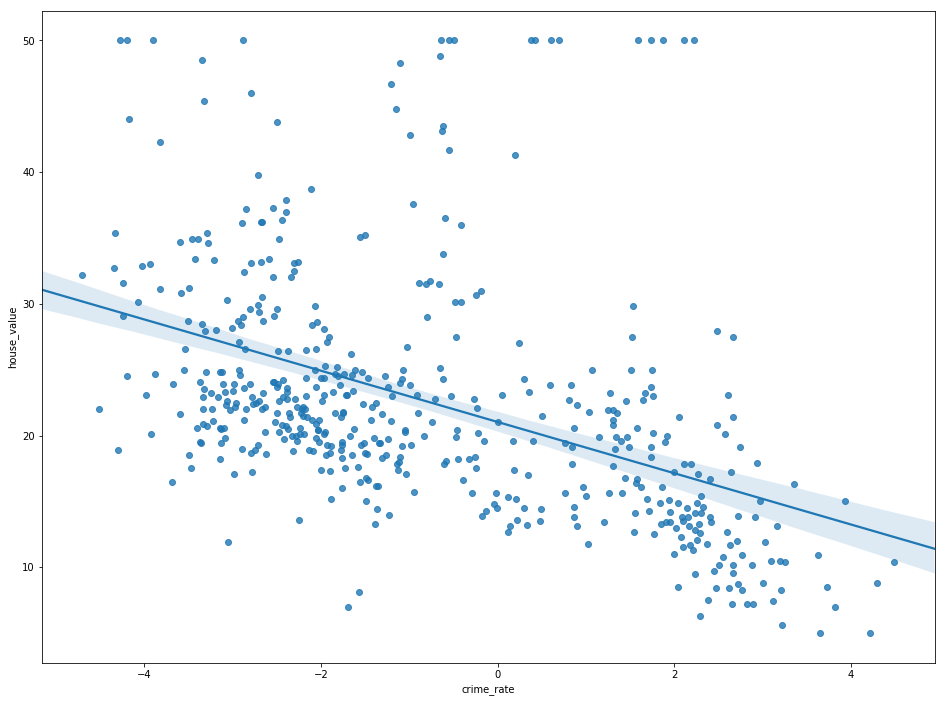

In [13]:
plt.figure(figsize=(16,12))
sns.regplot(x=np.log(df['crime_rate']), y=df['house_value'], fit_reg=True)

Transforming the values logarithmically leads to a bimodal distribution of values, and a much more dispersed scatterplot against the response variable, suggesting a higher covariance with house values.

In [14]:
cr_x = df['crime_rate'].values.reshape(-1,1)
cr_only = sklearn.linear_model.LinearRegression()
cr_only.fit(X=cr_x, y=df['house_value'])
print(f"R^2 of house_value against crime_rate: {cr_only.score(X=cr_x, y=df['house_value'])}")
cr_e_only = sklearn.linear_model.LinearRegression()
cr_e_only.fit(X=np.log(cr_x), y=df['house_value'])
print(f"R^2 of house_value against log(crime_rate): {cr_e_only.score(X=np.log(cr_x), y=df['house_value'])}")

R^2 of house_value against crime_rate: 0.15073760813058013
R^2 of house_value against log(crime_rate): 0.2074469513586947


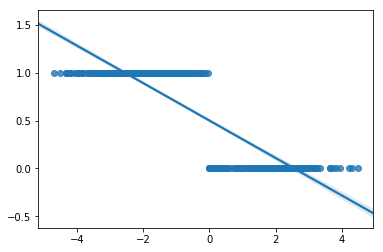

In [15]:
from sklearn import mixture
crime_rate_gmm = mixture.GaussianMixture(n_components=2)
crime_rate_gmm.fit(np.log(cr_x))
sns.regplot(x=np.log(cr_x), y=crime_rate_gmm.predict(np.log(cr_x)), fit_reg=True)

### Average number of rooms

In [16]:
df['avg_number_of_rooms'].describe()

count    505.000000
mean       6.284059
std        0.703195
min        3.561000
25%        5.885000
50%        6.208000
75%        6.625000
max        8.780000
Name: avg_number_of_rooms, dtype: float64

Difficult to form a priori hypothesis, since not a lot of information is known. The minimum value of 3.561 is rather high for a city, which brings into question if these are rooms per individual dwelling unit, or if e.g. a whole house is subdivided into flats and individual rooms within these flats are counted as part of the whole house.

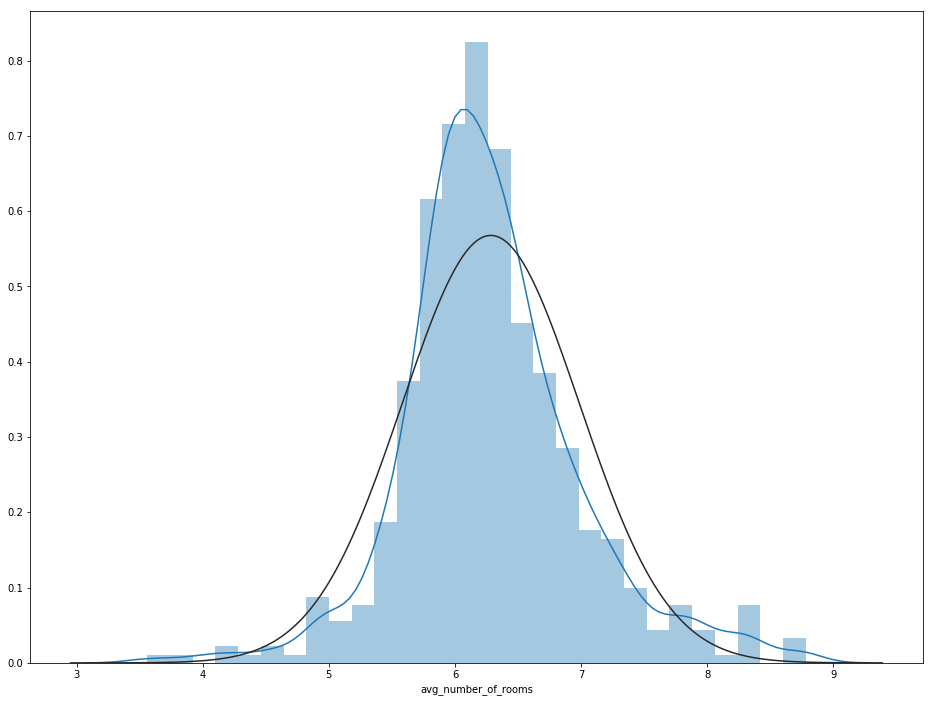

In [17]:
plt.figure(figsize=(16,12))
sns.distplot(df['avg_number_of_rooms'], fit=stats.norm)

Fairly normal distribution visually, possible negative skew and kurtosis.

In [18]:
stats.skew(df['avg_number_of_rooms'])

0.4045368674582929

In [19]:
stats.kurtosis(df['avg_number_of_rooms'])

1.8559723850565142

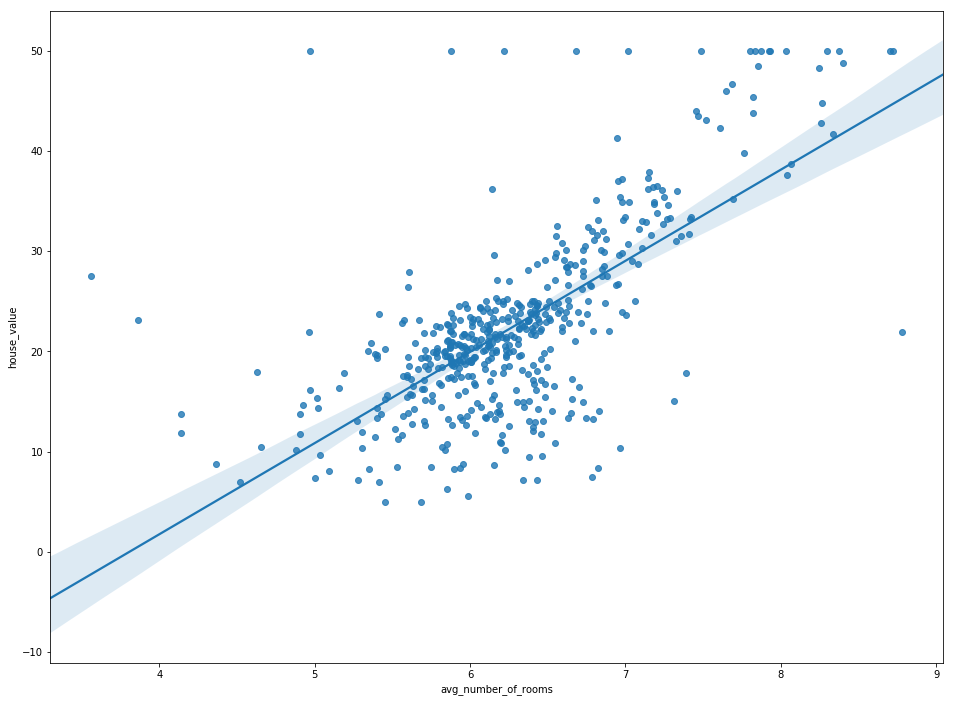

In [20]:
plt.figure(figsize=(16,12))
sns.regplot(x=df['avg_number_of_rooms'], y=df['house_value'], fit_reg=True)

Upward curving on the left side possibly indicative of a quadratic relationship?

### Weighted distance to employment centres

In [21]:
df['distance_to_employment_centers'].describe()

count    505.000000
mean       3.794459
std        2.107757
min        1.129600
25%        2.100000
50%        3.199200
75%        5.211900
max       12.126500
Name: distance_to_employment_centers, dtype: float64

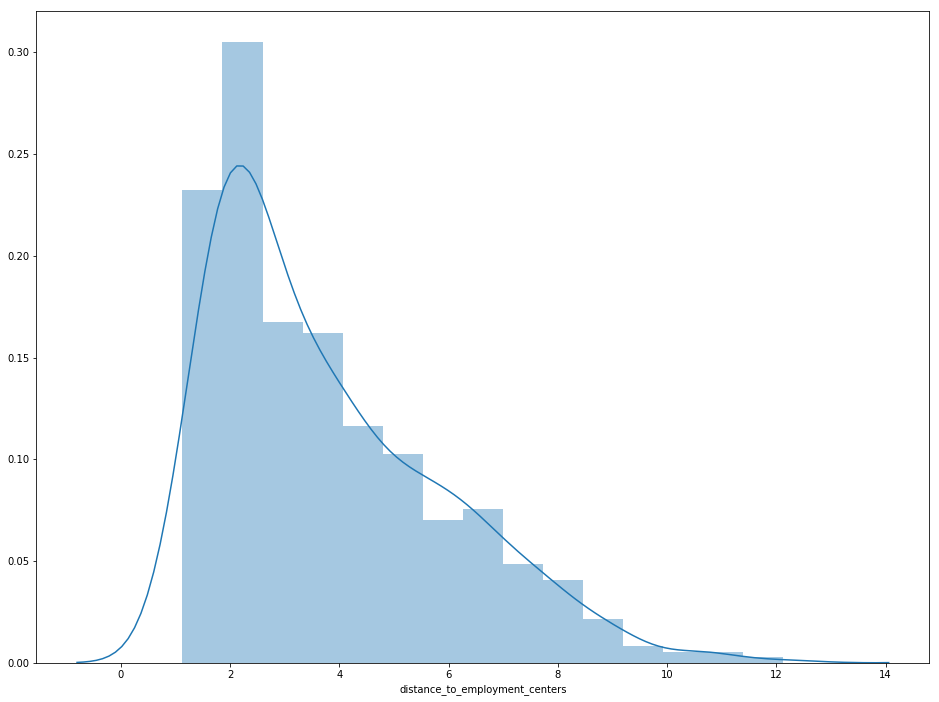

In [22]:
plt.figure(figsize=(16,12))
sns.distplot(df['distance_to_employment_centers'])

In [23]:
stats.skew(df['distance_to_employment_centers'])

1.0086670015707668

Seems to almost have a linear trend downwards from the first bar, although the second bar presents an anomaly. 

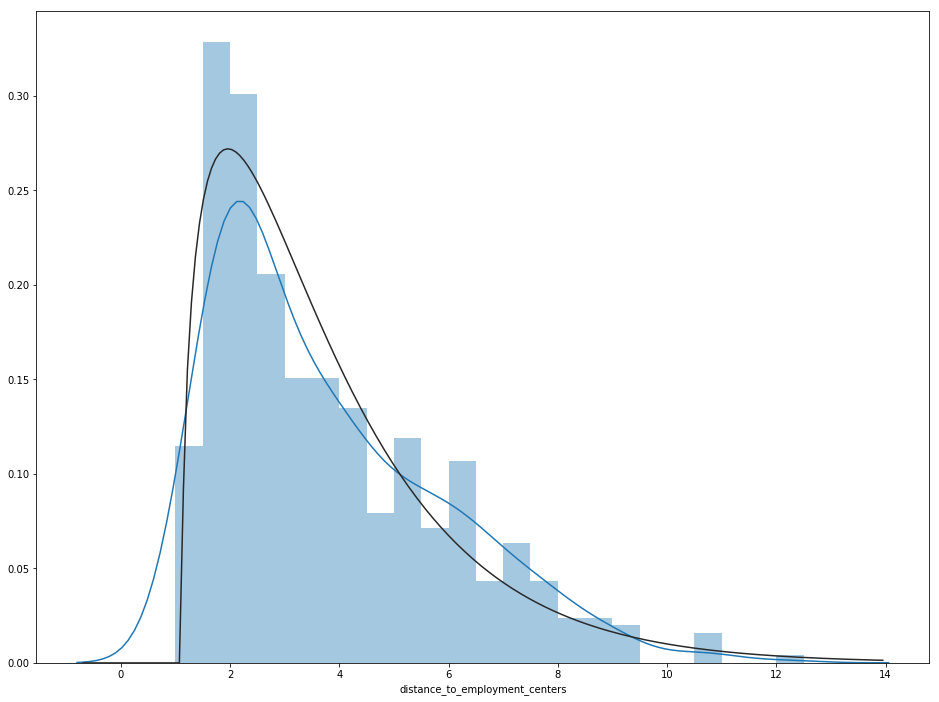

In [24]:
plt.figure(figsize=(16,12))
sns.distplot(df['distance_to_employment_centers'], bins=[x/2 for x in range(0,26)], fit=stats.gamma)

Pattern persists even in smaller bins. Interesting peaks in the right tails. Possible explanation for the pattern observed before is that employment centres are usually in the middle of some urban centre, such as a high street, and are therefore less likely to have residential properties near it. The weighted distance from the employment centres of each district is therefore less likely to be near zero.

Perhaps fit a gamma distribution?

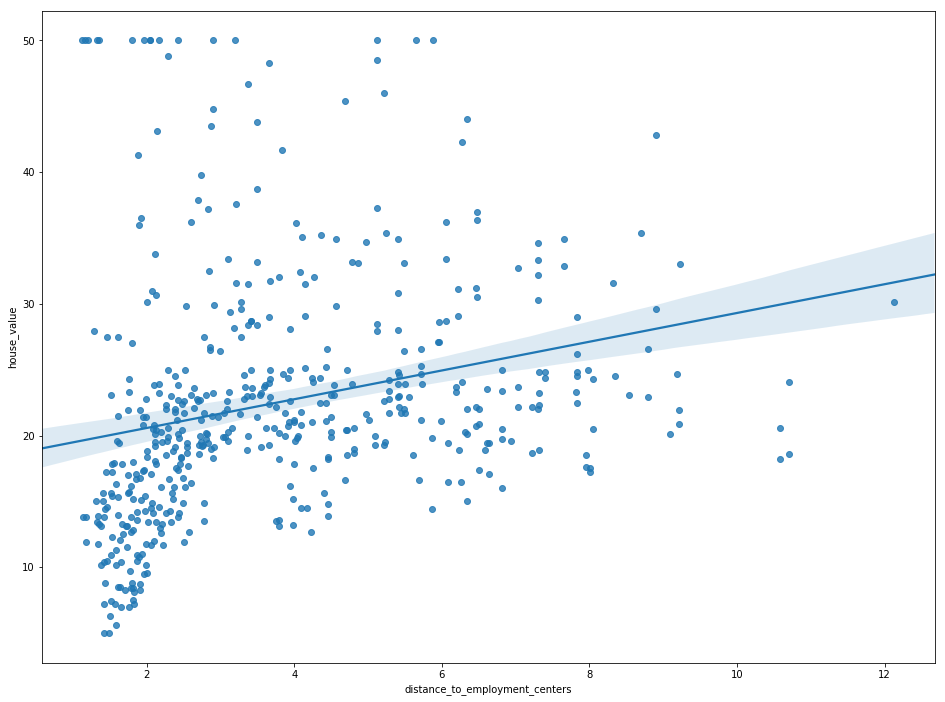

In [25]:
plt.figure(figsize=(16,12))
sns.regplot(x=df['distance_to_employment_centers'], y=df['house_value'], fit_reg=True)

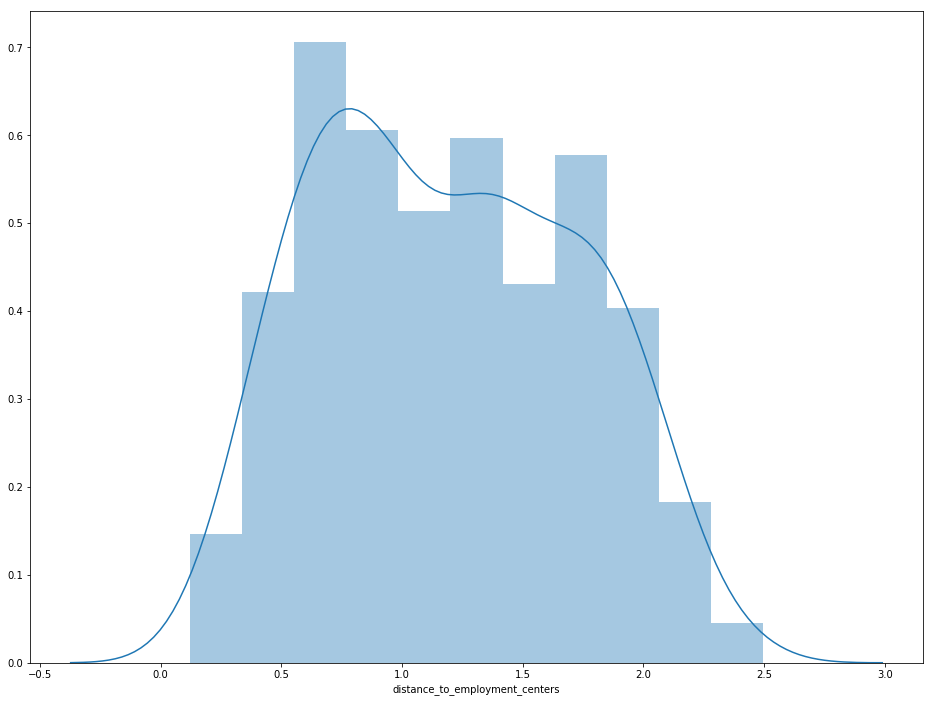

In [26]:
plt.figure(figsize=(16,12))
sns.distplot(np.log(df['distance_to_employment_centers']))

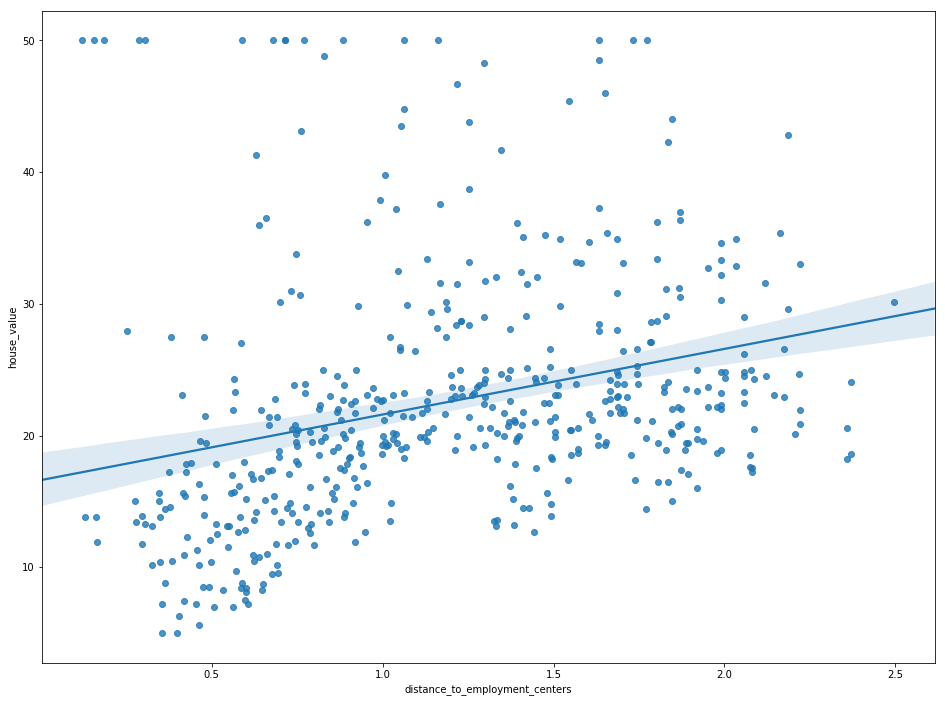

In [27]:
plt.figure(figsize=(16,12))
sns.regplot(x=np.log(df['distance_to_employment_centers']), y=df['house_value'], fit_reg=True)

### Property tax rate per \$10,000

In [28]:
df['property_tax_rate'].describe()

count    505.000000
mean     408.459406
std      168.629992
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: property_tax_rate, dtype: float64

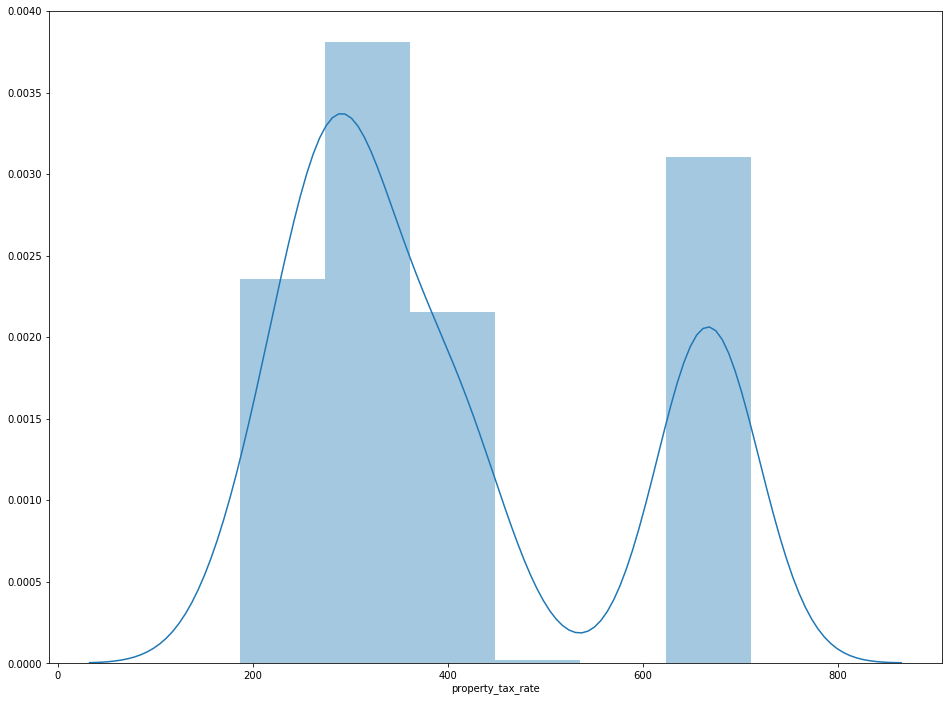

In [29]:
plt.figure(figsize=(16,12))
sns.distplot(df['property_tax_rate'])

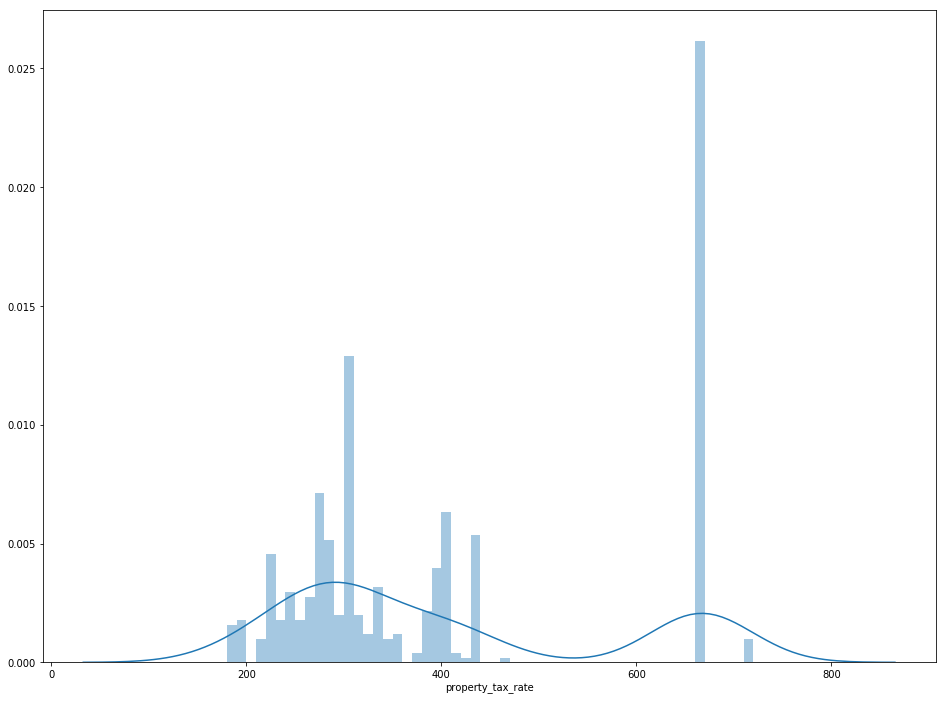

In [30]:
plt.figure(figsize=(16,12))
sns.distplot(df['property_tax_rate'], bins=[x for x in range(180, 730, 10)])

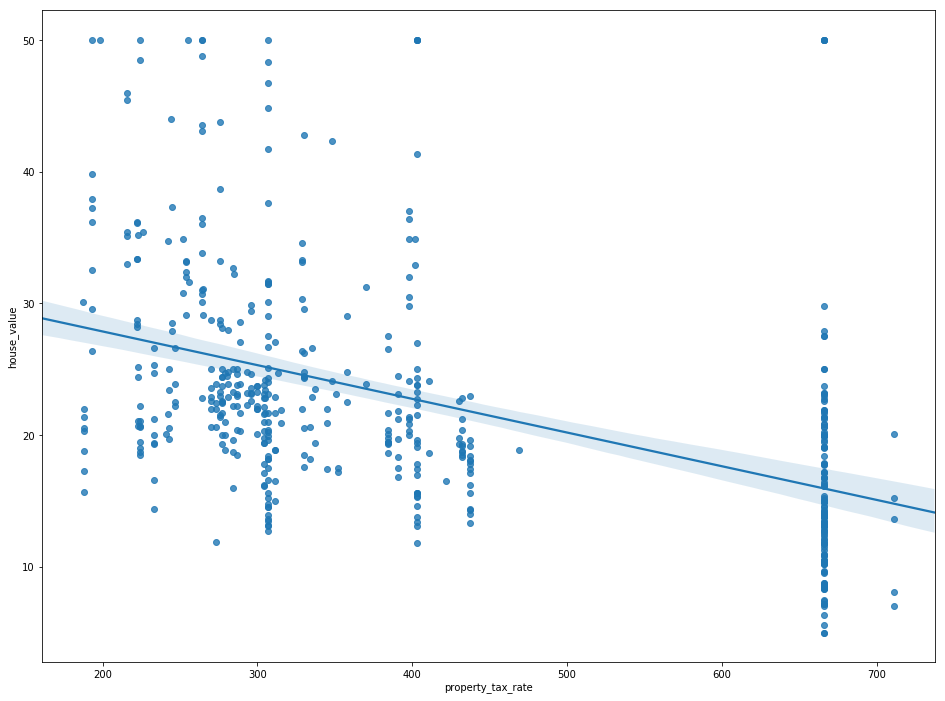

In [31]:
plt.figure(figsize=(16,12))
sns.regplot(x=df['property_tax_rate'], y=df['house_value'], fit_reg=True)

Values seem almost discrete on the x-axis... Check?

In [32]:
df['property_tax_rate'].nunique()

66

In [33]:
sorted(df['property_tax_rate'].unique())

[187.0,
 188.0,
 193.0,
 198.0,
 216.0,
 222.0,
 223.0,
 224.0,
 226.0,
 233.0,
 241.0,
 242.0,
 243.0,
 244.0,
 245.0,
 247.0,
 252.0,
 254.0,
 255.0,
 256.0,
 264.0,
 265.0,
 270.0,
 273.0,
 276.0,
 277.0,
 279.0,
 280.0,
 281.0,
 284.0,
 285.0,
 287.0,
 289.0,
 293.0,
 296.0,
 300.0,
 304.0,
 305.0,
 307.0,
 311.0,
 313.0,
 315.0,
 329.0,
 330.0,
 334.0,
 335.0,
 337.0,
 345.0,
 348.0,
 351.0,
 352.0,
 358.0,
 370.0,
 384.0,
 391.0,
 398.0,
 402.0,
 403.0,
 411.0,
 422.0,
 430.0,
 432.0,
 437.0,
 469.0,
 666.0,
 711.0]

Values are all integers, with only 66 unique values - explains shape of the scatterplot.

### Pupil-teacher ratio

In [34]:
df['pupil_teacher_ratio'].describe()

count    505.000000
mean      18.461782
std        2.162520
min       12.600000
25%       17.400000
50%       19.100000
75%       20.200000
max       22.000000
Name: pupil_teacher_ratio, dtype: float64

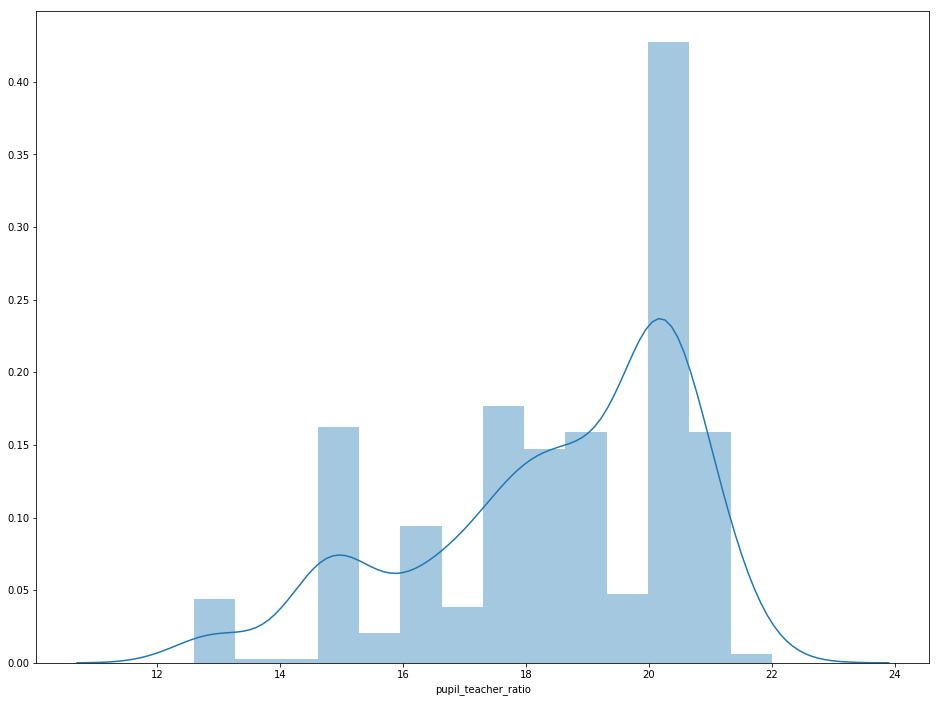

In [35]:
plt.figure(figsize=(16,12))
sns.distplot(df['pupil_teacher_ratio'])

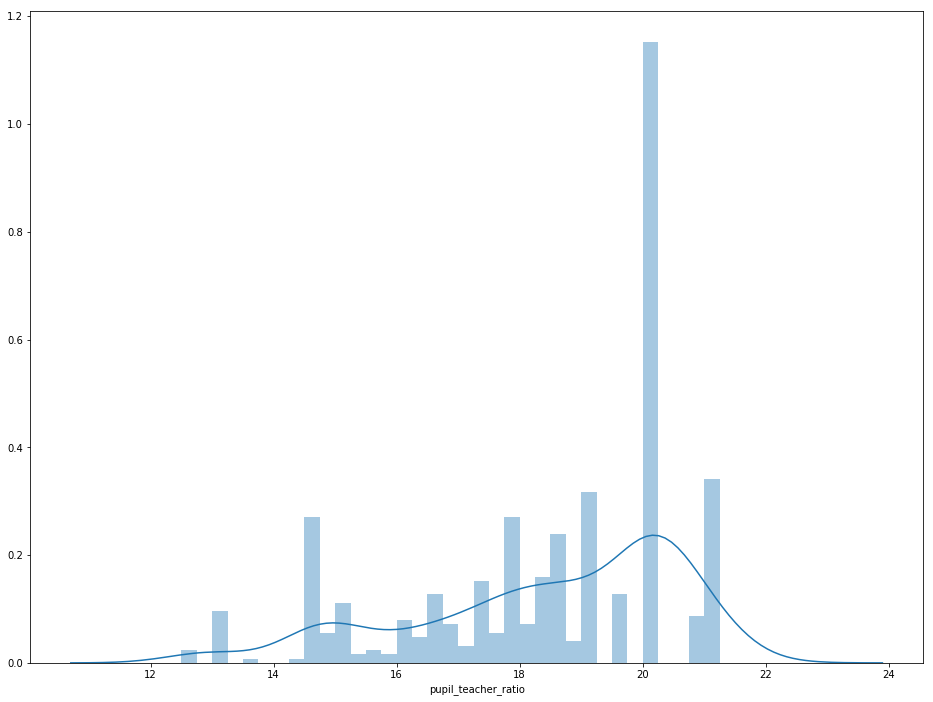

In [36]:
plt.figure(figsize=(16,12))
sns.distplot(df['pupil_teacher_ratio'], bins=[x/4 for x in range(48,88)])

Skewed multimodal distribution? Hard to tell what it is, perhaps read further into multimodal distributions. Alternatively, try transformation?

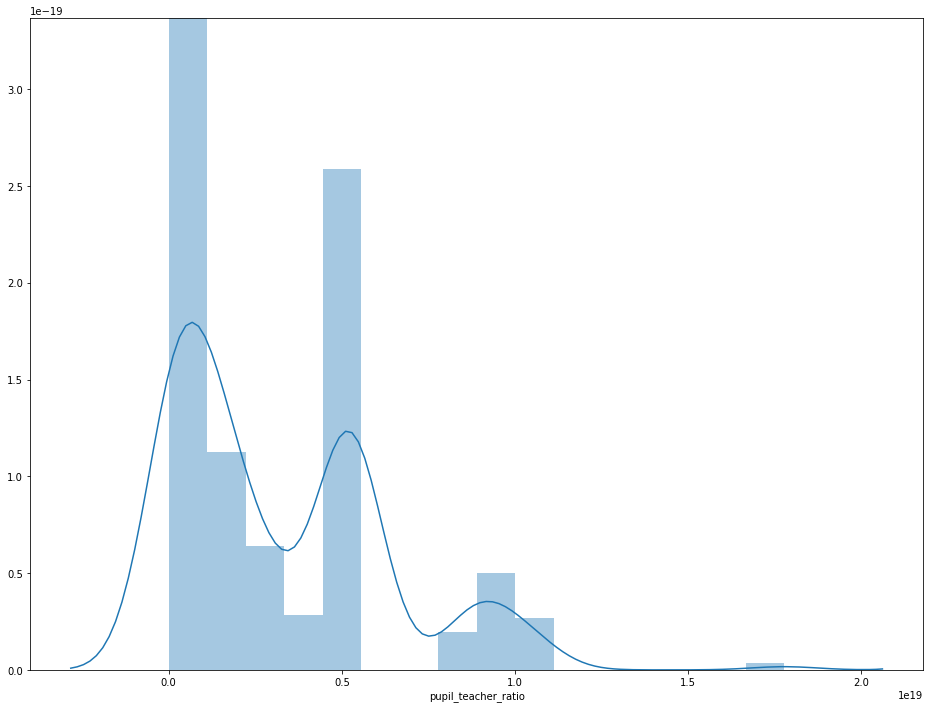

In [37]:
from scipy.special import boxcox1p
plt.figure(figsize=(16,12))
sns.distplot(boxcox1p(df['pupil_teacher_ratio'], 15))

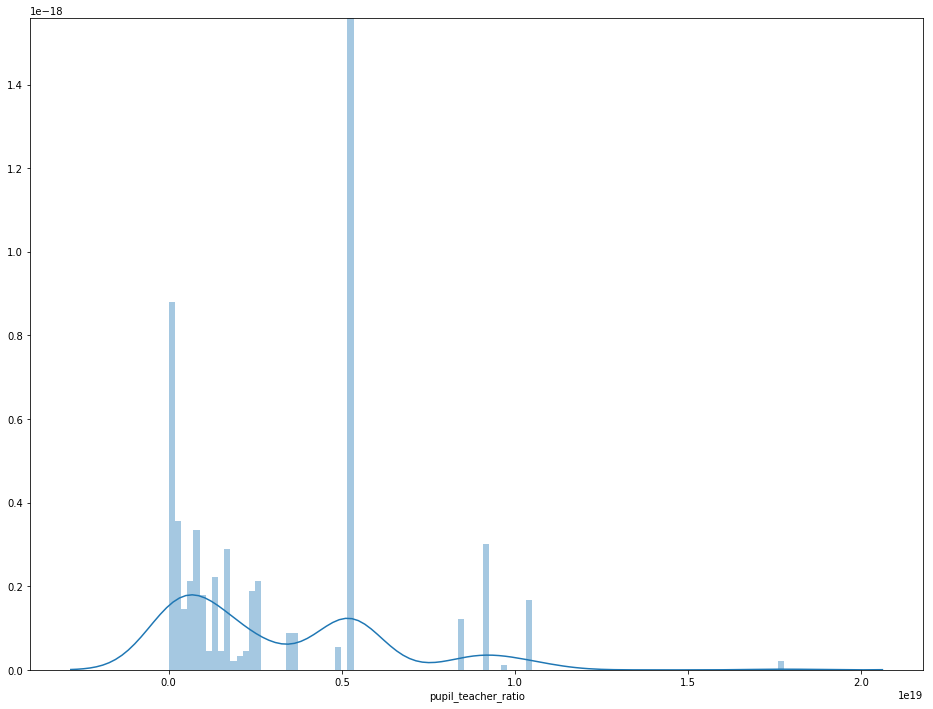

In [38]:
plt.figure(figsize=(16,12))
sns.distplot(boxcox1p(df['pupil_teacher_ratio'], 15), bins=100)

Possible transformations to correct for the skewness result in multimodal distribution, and interpretation of such a transformation should be treated with caution. For the purpose of this initial analysis, leave this value untransformed, but this is a possible avenue for exploration.

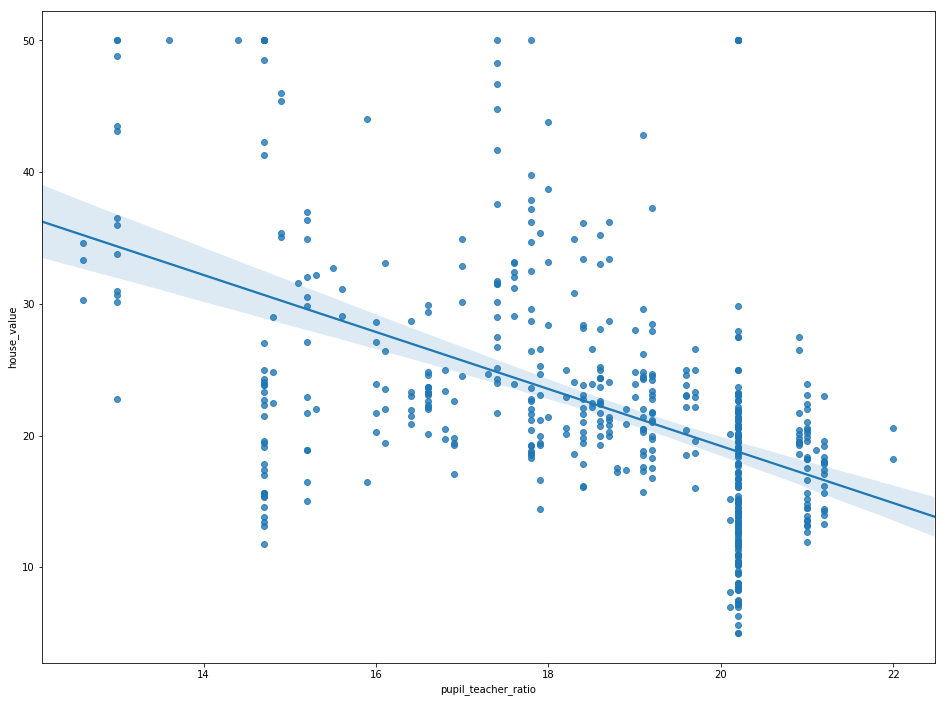

In [39]:
plt.figure(figsize=(16,12))
sns.regplot(x=df['pupil_teacher_ratio'], y=df['house_value'], fit_reg=True)

# Putting it all together

### Recap of key notes
* Response variable of house values seem to be capped at a maximum value of 50.0
* A logarithmic transformation of crime rate yields a bimodal distribution, but with much improved covariance with house values.
* Average number of rooms is fairly normal, but with fatter tails and a slight skew.
* Weighted distance to employment centre seems to be generated from a gamma distribution?
* Property tax rate seems almost discrete, and is bimodal.
* Pupil to teacher ratio seems to have a multimodal distribution, and is quite flat.

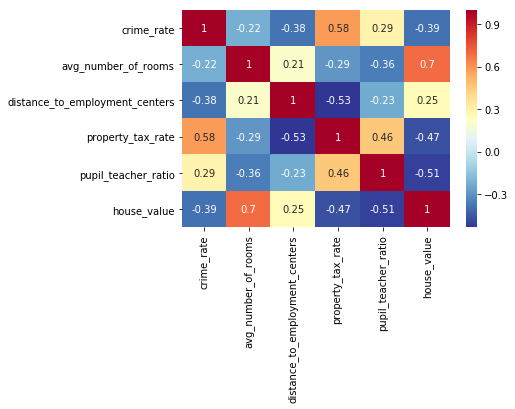

In [40]:
#plt.figure.figsize(16,12)
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(df.corr(), cmap="RdYlBu_r", annot=True)

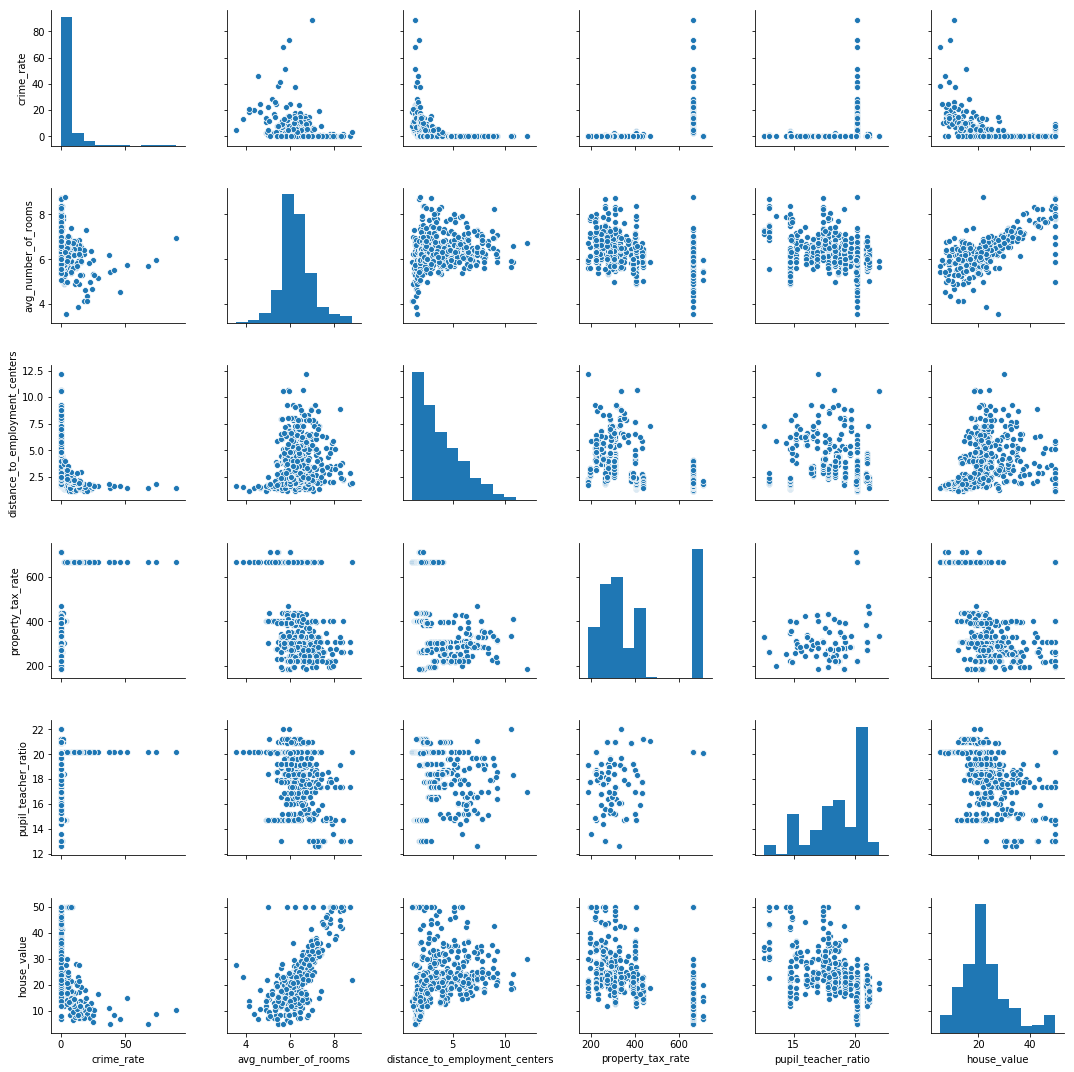

In [41]:
sns.pairplot(df)

## Transformation of values

In [42]:
df_trans = df.copy(deep=True)
df_trans['crime_rate'] = np.log(df['crime_rate'])
#df_trans['crime_rate'] = df['crime_rate'].apply(np.log)

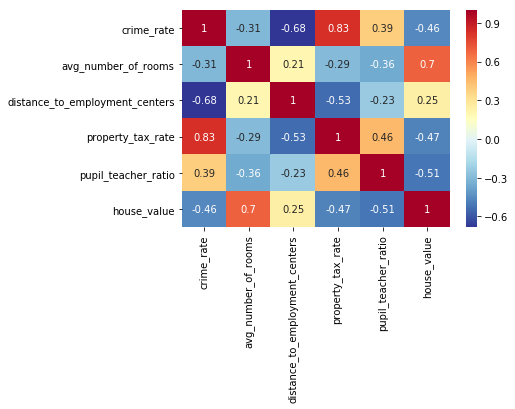

In [43]:
#plt.figure.figsize(16,12)
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(df_trans.corr(), cmap="RdYlBu_r", annot=True)

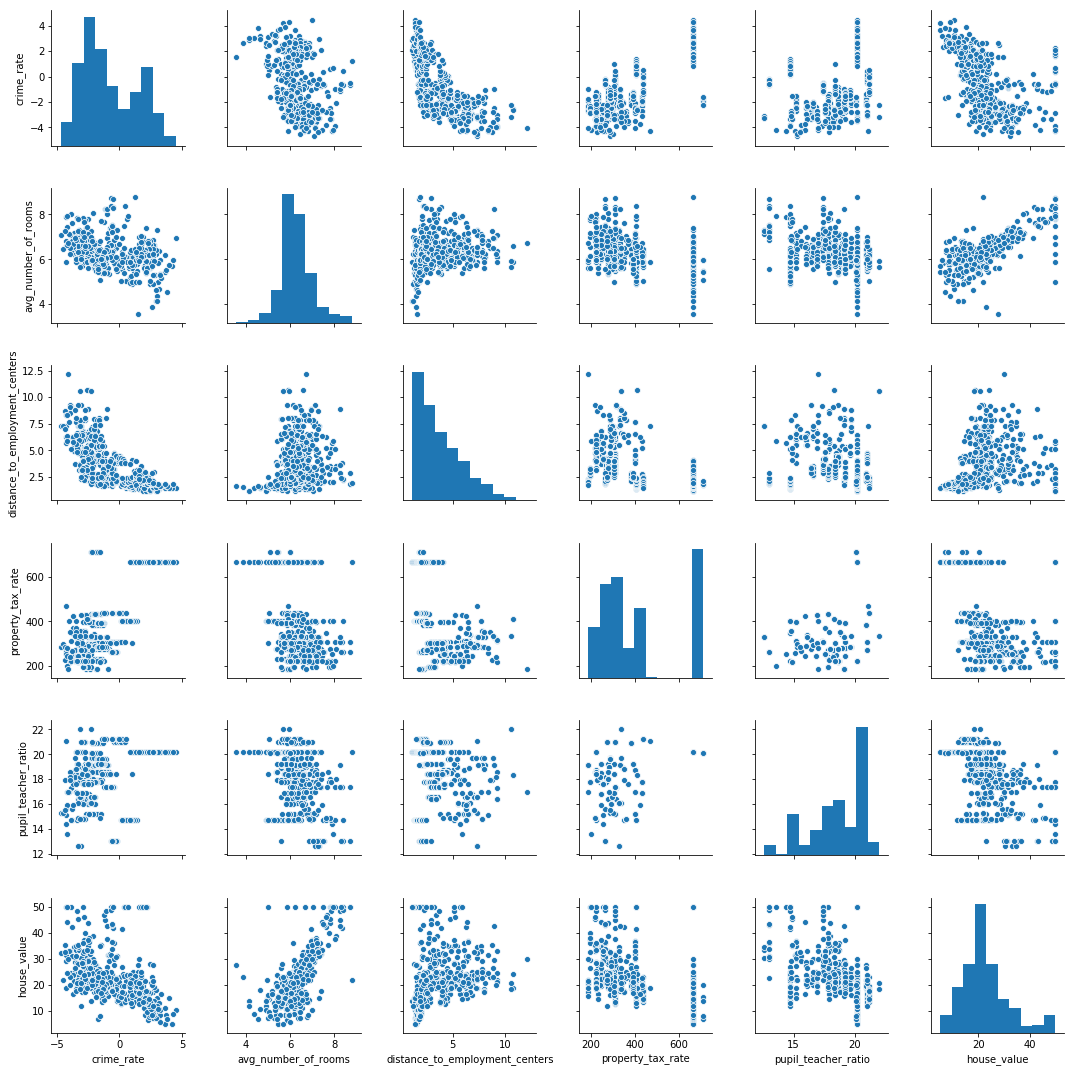

In [44]:
sns.pairplot(df_trans)

# Oh why not...

In [45]:
orig_model = sklearn.linear_model.LinearRegression()
orig_model.fit(X=df.drop(['house_value'], axis=1), y=df['house_value'])
print(orig_model.score(X=df.drop(['house_value'], axis=1), y=df['house_value']))

0.6067850198780184


In [46]:
simple_model = sklearn.linear_model.LinearRegression()
simple_model.fit(X=df_trans.drop(['house_value'], axis=1), y=df_trans['house_value'])
print(simple_model.score(X=df_trans.drop(['house_value'], axis=1), y=df_trans['house_value']))

0.6019144576566187


In [47]:
simple_model.coef_

array([-7.13309063e-01,  7.22680111e+00, -3.98043307e-01, -6.50512766e-03,
       -9.12087434e-01])

In [48]:
y_pred = simple_model.predict(X=df_trans.drop(['house_value'], axis=1))

MSE: 33.67105146243978


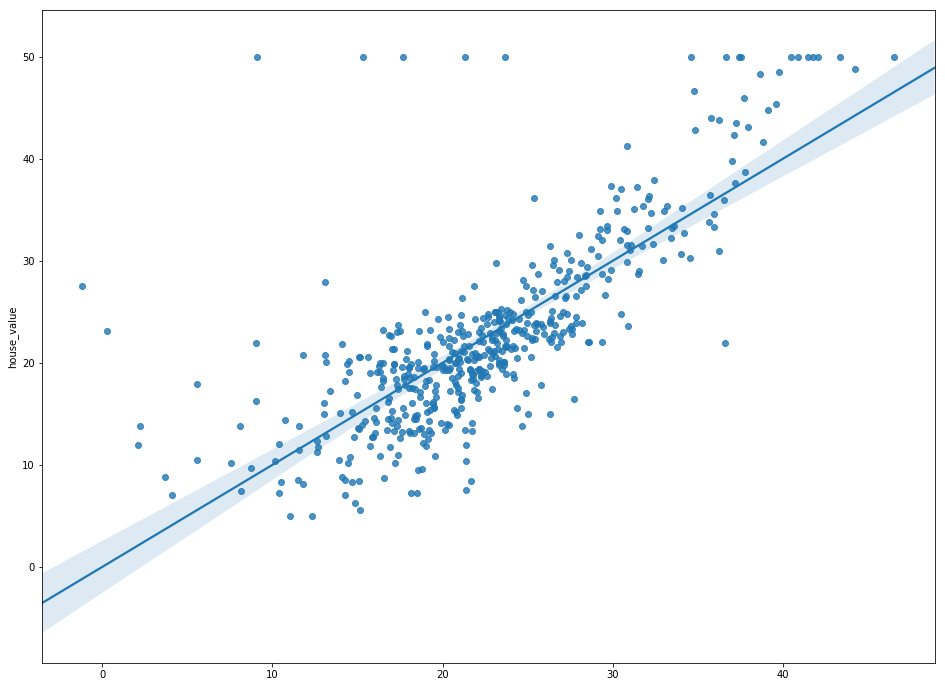

In [49]:
plt.figure(figsize=(16,12))
print(f"MSE: {sklearn.metrics.mean_squared_error(y_pred, df['house_value'])}")
sns.regplot(x=y_pred, y=df['house_value'], fit_reg=True)

Thought: why not try to classify where house_value is likely to exceed 50.0, and then fit different parameters accordingly?

In [50]:
sm_sm = sm.OLS(df_trans['house_value'], sm.add_constant(df_trans.drop(['house_value'], axis=1)))
#sm_sm = sm.OLS(df_trans['house_value'], df_trans.drop(['house_value'], axis=1))
print(sm_sm.fit().summary())

                            OLS Regression Results                            
Dep. Variable:            house_value   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     150.9
Date:                Mon, 27 Aug 2018   Prob (F-statistic):           2.19e-97
Time:                        16:53:46   Log-Likelihood:                -1604.5
No. Observations:                 505   AIC:                             3221.
Df Residuals:                     499   BIC:                             3246.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

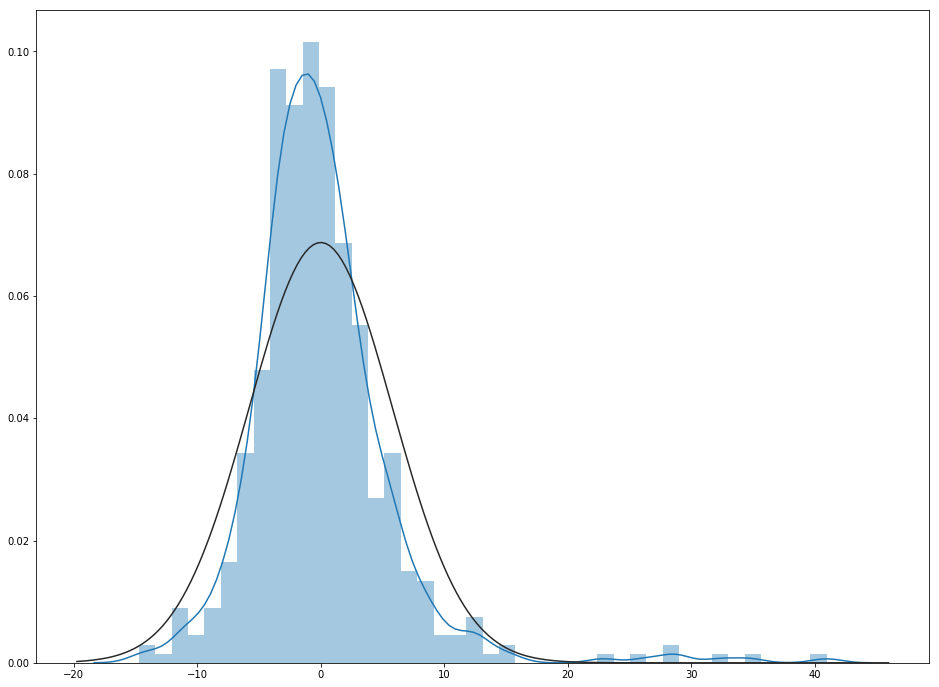

In [51]:
plt.figure(figsize=(16,12))
sns.distplot(sm_sm.fit().resid, fit=stats.norm)

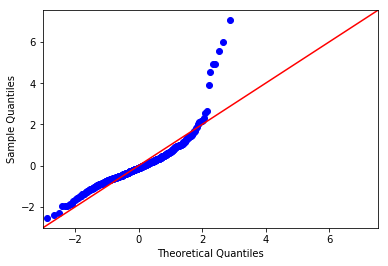

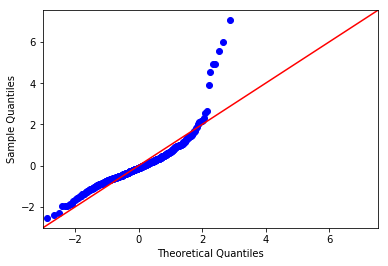

In [52]:
sm.qqplot(sm_sm.fit().resid, line='45', fit=True)

### Thoughts about current issues to be addressed
* Ceiling of house_value - Tobit model? Clustering?
    * Problematic for prediction because it results in distortion of the prediction
* Multicollinearity
    * Not necessarily a problem for prediction, but for parsimony of model?
* Error analysis? Generative models?
* Cross validation?

### Tobit model for response variable

MSE: 39.524593329983865


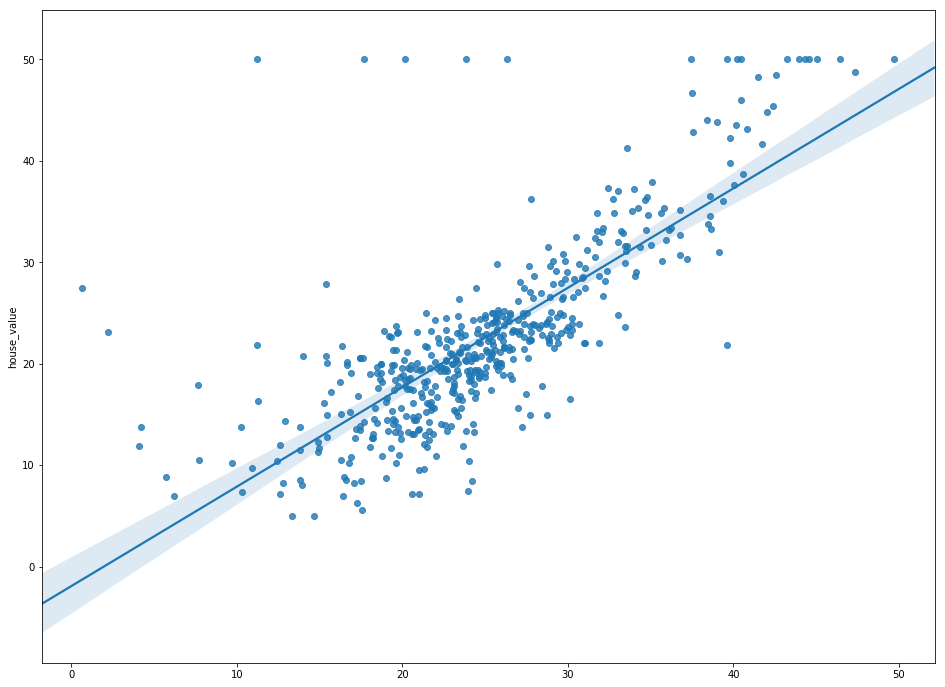

In [53]:
from tobit import *
cens = pd.Series(np.zeros(len(df['house_value'])))
cens[df['house_value'] >= 50] = 1
tobit_model = TobitModel()
tobit_model_fit = tobit_model.fit(
    x=df_trans.drop(['house_value'], axis=1),
    y=df['house_value'],
    cens=cens
)
y_tobit = tobit_model_fit.predict(df_trans.drop(['house_value'], axis=1))
print(f"MSE: {sklearn.metrics.mean_squared_error(y_tobit, df['house_value'])}")
plt.figure(figsize=(16,12))
sns.regplot(x=y_tobit, y=df['house_value'], fit_reg=True)

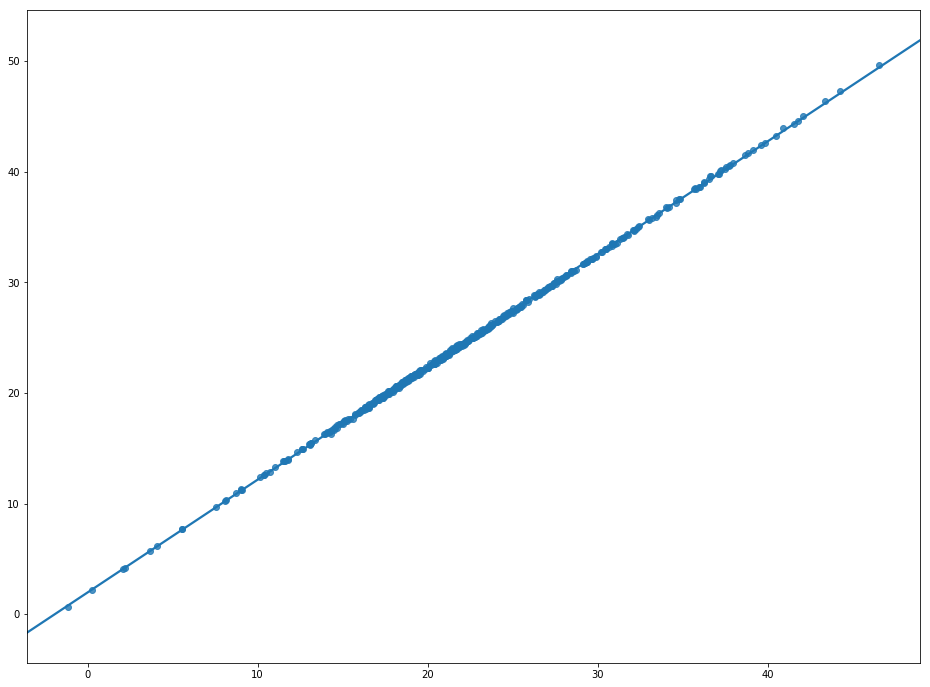

In [54]:
plt.figure(figsize=(16,12))
sns.regplot(x=y_pred, y=y_tobit, fit_reg=True)

In [55]:
cens.value_counts()

0.0    489
1.0     16
dtype: int64

In [56]:
print(f"Simple model coefs: {simple_model.coef_}")
print(f"Tobit model coefs: {tobit_model_fit.coef_}")

Simple model coefs: [-7.13309063e-01  7.22680111e+00 -3.98043307e-01 -6.50512766e-03
 -9.12087434e-01]
Tobit model coefs: [-6.94280565e-01  7.44249673e+00 -4.23415178e-01 -6.58179372e-03
 -9.41015315e-01]


The Tobit model seems to produce a worse MSE than the simple regression model, and barely different coefficients. Given relative unfamiliarity, perhaps shelve this as an option for the time being.

### Clustering prediction of response variable?

[1707033.1478692389, 470266.0634189793, 182686.1322136529, 115242.31412238348, 88512.59911401285, 78671.93464721413, 49552.15896128113, 29599.53266130434, 25842.802548781372, 22478.14944077739]


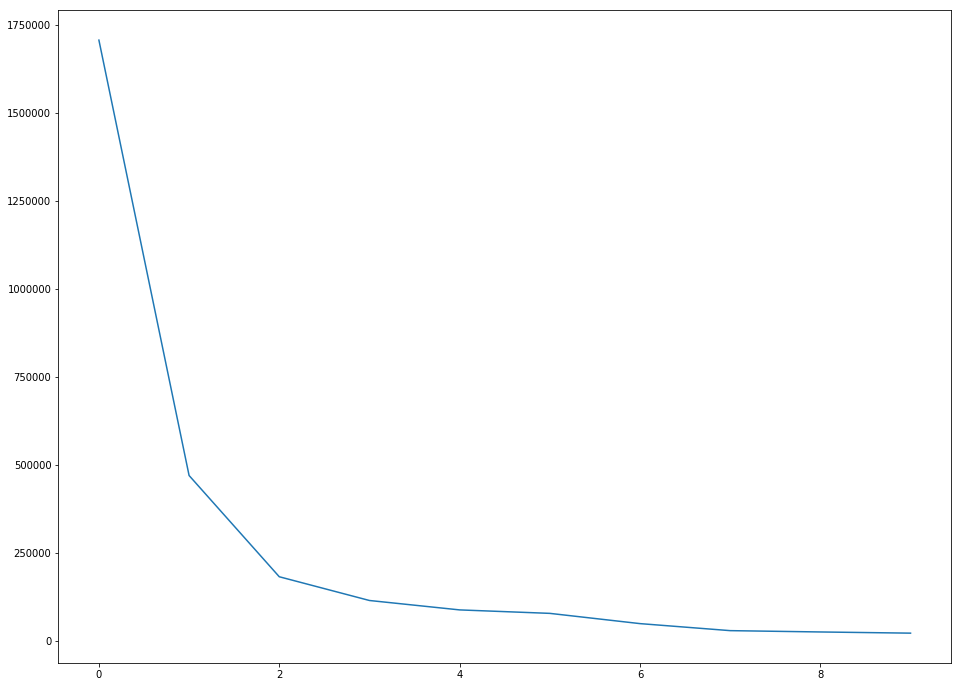

In [57]:
cluster_results = [None] * 10
for i in range(10):
    temp_cluster = sklearn.cluster.KMeans(n_clusters=i+2).fit(df_trans.drop(['house_value'], axis=1))
    cluster_results[i] = temp_cluster.inertia_
print(cluster_results)
plt.figure(figsize=(16,12))
plt.plot(cluster_results)

Inertia: 1707033.1478692389


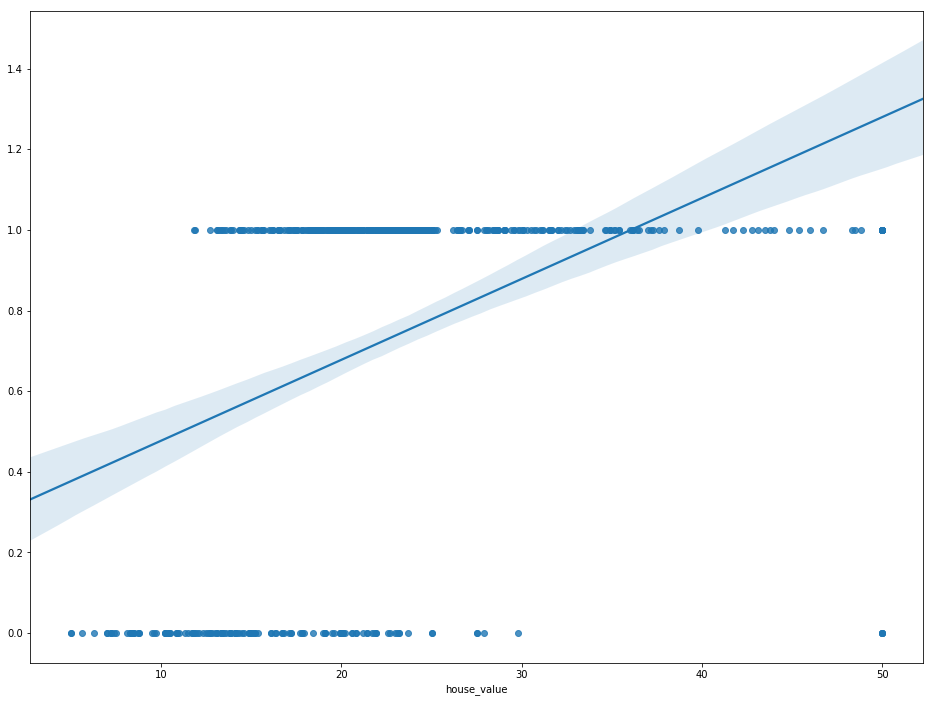

In [58]:
cluster_model = sklearn.cluster.KMeans(n_clusters=2).fit(df_trans.drop(['house_value'], axis=1))
cluster_predict = cluster_model.predict(df_trans.drop(['house_value'], axis=1))
print(f"Inertia: {cluster_model.inertia_}")
plt.figure(figsize=(16,12))
sns.regplot(x=df_trans['house_value'], y=cluster_predict, fit_reg=True)

Inertia: 470266.0634189793


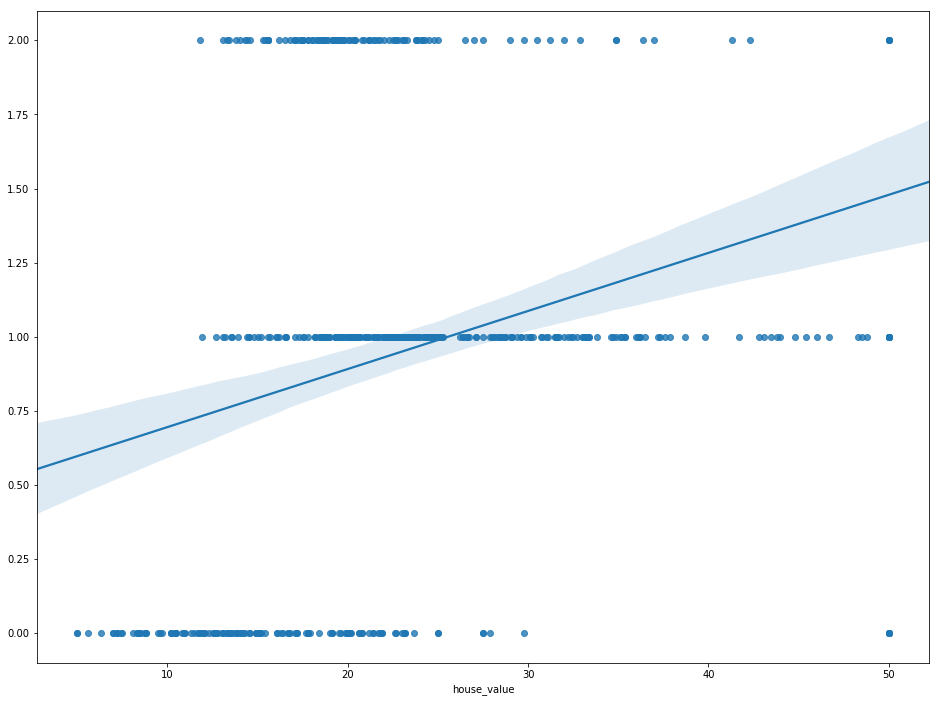

In [59]:
cluster_model = sklearn.cluster.KMeans(n_clusters=3).fit(df_trans.drop(['house_value'], axis=1))
cluster_predict = cluster_model.predict(df_trans.drop(['house_value'], axis=1))
print(f"Inertia: {cluster_model.inertia_}")
plt.figure(figsize=(16,12))
sns.regplot(x=df_trans['house_value'], y=cluster_predict, fit_reg=True)

Inertia: 182686.1322136529


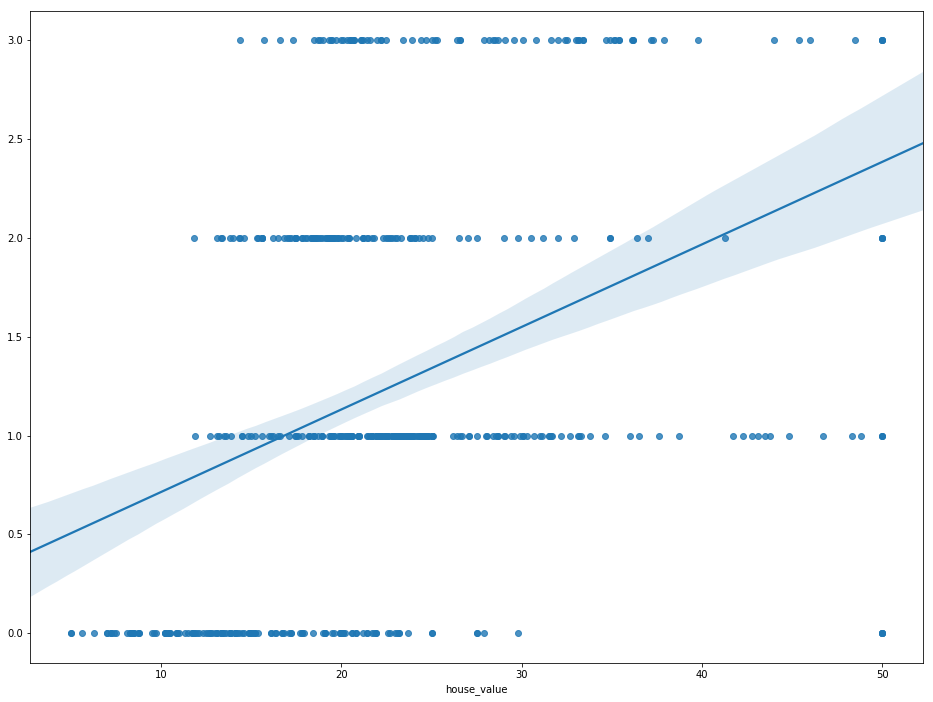

In [60]:
cluster_model = sklearn.cluster.KMeans(n_clusters=4).fit(df_trans.drop(['house_value'], axis=1))
cluster_predict = cluster_model.predict(df_trans.drop(['house_value'], axis=1))
print(f"Inertia: {cluster_model.inertia_}")
plt.figure(figsize=(16,12))
sns.regplot(x=df_trans['house_value'], y=cluster_predict, fit_reg=True)

Clustering does not seem to help identify where the house_value may be hitting the ceiling either, with all clusters possessing at least one maximum value.

### Polynomial model

PCA components: [[ 1.06003834e-02 -1.21634201e-03 -6.68127594e-03  9.99903344e-01
   5.90054841e-03]
 [-2.64920396e-01 -5.78497442e-02  5.76808505e-01  2.04519727e-03
   7.70557173e-01]
 [-3.48281008e-01  9.15920104e-02  6.89102300e-01  1.21184298e-02
  -6.28730791e-01]
 [-8.92995239e-01  9.74335337e-02 -4.38421832e-01  6.48803899e-03
   2.84677446e-02]
 [ 1.04712264e-01  9.89327821e-01  1.31006334e-02 -4.11961871e-04
   1.00468939e-01]]
PCA explained variance: [2.84415715e+04 3.74997206e+00 3.68023034e+00 9.24524264e-01
 4.08884365e-01]
PCA explained variance ratio: [9.99691968e-01 1.31807659e-04 1.29356309e-04 3.24960764e-05
 1.43718646e-05]


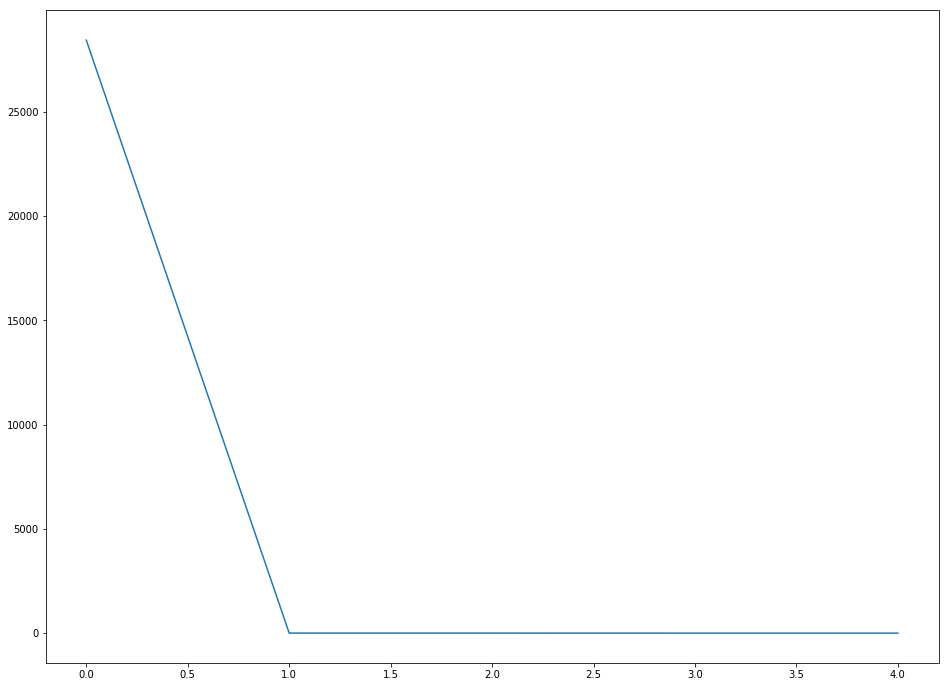

In [61]:
full_pca = sklearn.decomposition.PCA()
full_pca.fit(df_trans.drop(['house_value'], axis=1))
print(f"PCA components: {full_pca.components_}")
print(f"PCA explained variance: {full_pca.explained_variance_}")
print(f"PCA explained variance ratio: {full_pca.explained_variance_ratio_}")
plt.figure(figsize=(16,12))
plt.plot(full_pca.explained_variance_)
df_pca = full_pca.transform(df_trans.drop(['house_value'], axis=1))

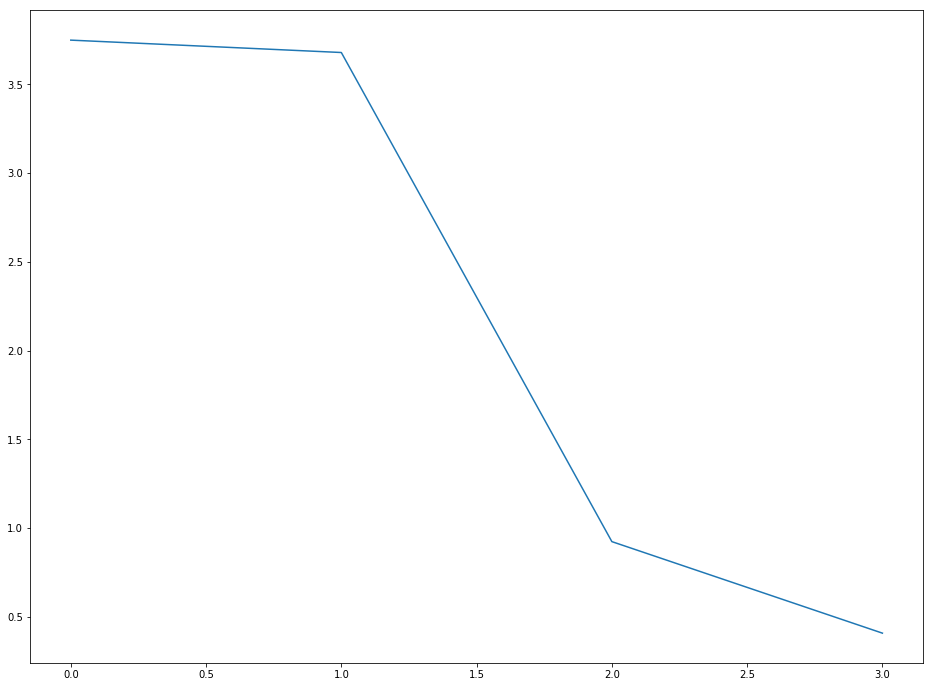

In [62]:
plt.figure(figsize=(16,12))
plt.plot(full_pca.explained_variance_[1:])

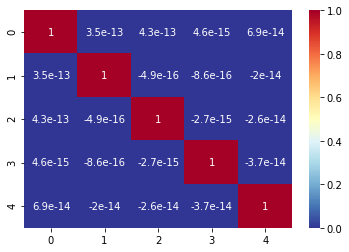

In [63]:
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(pd.DataFrame(df_pca).corr(), cmap="RdYlBu_r", annot=True)

In [64]:
reduced_pca = sklearn.decomposition.PCA(n_components=1).fit(df_trans.drop(['house_value'], axis=1))
print(f"PCA components: {reduced_pca.components_}")
print(f"PCA explained variance: {reduced_pca.explained_variance_}")
print(f"PCA explained variance ratio: {reduced_pca.explained_variance_ratio_}")
df_reduced_pca = reduced_pca.transform(df_trans.drop(['house_value'], axis=1))

PCA components: [[ 0.01060038 -0.00121634 -0.00668128  0.99990334  0.00590055]]
PCA explained variance: [28441.57150292]
PCA explained variance ratio: [0.99969197]


In [65]:
from sklearn.pipeline import Pipeline
poly_model = Pipeline([('poly', sklearn.preprocessing.PolynomialFeatures(5)),
                       ('linear', sklearn.linear_model.LinearRegression())
                      ])
poly_model.fit(X=df_pca, y=df_trans['house_value'])
y_pred_poly = poly_model.predict(X=df_pca)
print(f"R^2: {poly_model.score(X=df_pca, y=df_trans['house_value'])}")
print(f"MSE: {sklearn.metrics.mean_squared_error(y_pred_poly, df['house_value'])}")

R^2: 0.9269007676432881
MSE: 6.182912346072074


In [66]:
poly_model.named_steps['linear'].coef_

array([ 1.81725274e+01,  6.24475570e-01, -1.38212777e+01,  8.87651537e-01,
       -3.74598205e+01,  4.78008395e+01,  3.32320026e-03, -1.68023170e-01,
       -7.70011044e-02, -7.78342102e-01,  6.28014988e-01,  4.25875772e+00,
        2.00386431e+00,  1.22308011e+01, -5.22535951e+00, -4.39811736e-01,
        5.35787429e+00,  5.84469244e+00,  1.16189815e+01, -2.85101936e+01,
        1.47898533e+01, -1.18575990e-05,  1.03084409e-03, -1.46043117e-03,
       -3.73417405e-03,  2.37006152e-03,  1.32670385e-02,  1.06332362e-01,
        1.51976194e-01, -1.66445533e-01, -4.29230068e-02,  9.52353281e-03,
        1.24526303e-01,  1.66486309e-01, -3.05168927e-01,  1.06891579e-01,
        1.80439960e+00, -2.26291471e+00, -6.80229422e-01,  8.97676395e-01,
       -1.08232570e+00, -9.06412712e-01,  4.02645136e+00, -8.88039841e+00,
       -1.14085915e-01,  3.55059896e+00, -1.38621859e-01,  3.09817556e+00,
       -3.70824620e+00, -2.52973924e+00,  7.66176150e-01, -9.98040090e-01,
        1.33470570e+00,  

MSE: 6.182912346072074


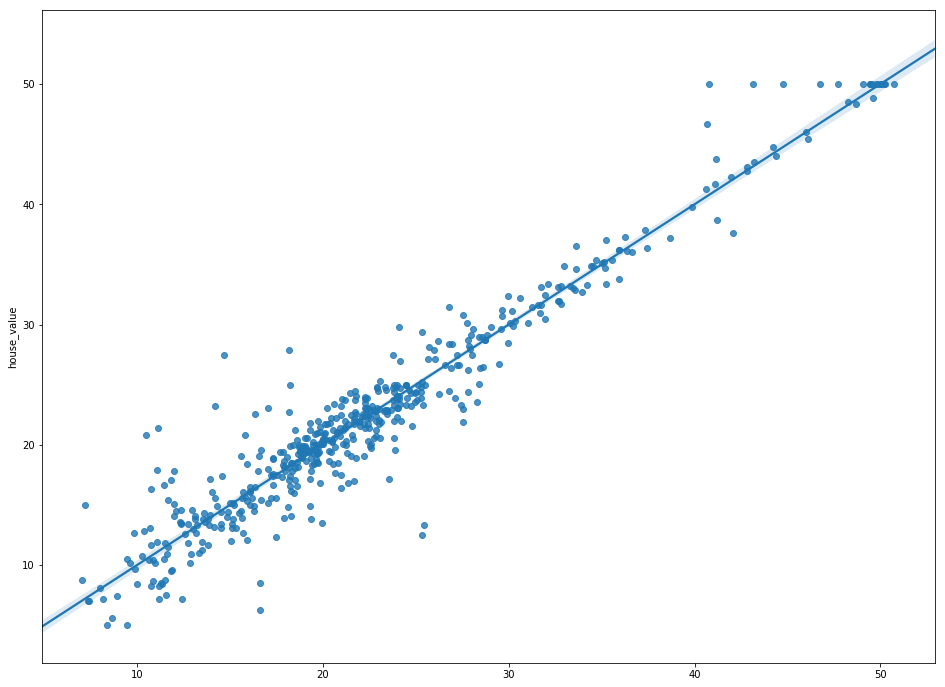

In [67]:
plt.figure(figsize=(16,12))
print(f"MSE: {sklearn.metrics.mean_squared_error(y_pred_poly, df['house_value'])}")
sns.regplot(x=y_pred_poly, y=df['house_value'], fit_reg=True)

In [68]:
df_poly = pd.DataFrame(sklearn.preprocessing.PolynomialFeatures(5).fit(df_pca).transform(df_pca))
df_poly

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
0,1.0,-166.485206,0.567424,0.204598,0.926277,-0.143256,27717.323967,-94.467768,-34.062615,-154.211378,...,-0.023294,0.003603,-5.571604e-04,8.616916e-05,6.818736e-01,-0.105457,0.016310,-2.522427e-03,3.901129e-04,-6.033397e-05
1,1.0,-166.486144,0.523421,0.274830,1.001370,0.612514,27717.635978,-87.142389,-45.755369,-166.714262,...,0.169030,0.103392,6.324213e-02,3.868368e-02,1.006870e+00,0.615878,0.376718,2.304290e-01,1.409478e-01,8.621438e-02
2,1.0,-186.484179,1.773275,0.144656,0.246450,0.558393,34776.349196,-330.687670,-26.976084,-45.958989,...,0.001209,0.002740,6.207050e-03,1.406361e-02,9.091642e-04,0.002060,0.004667,1.057491e-02,2.396008e-02,5.428749e-02
3,1.0,-186.476330,1.563952,-0.105554,-0.415565,0.785133,34773.421604,-291.639968,19.683307,77.492987,...,0.005947,-0.011237,2.122962e-02,-4.010944e-02,-1.239348e-02,0.023415,-0.044239,8.358081e-02,-1.579105e-01,2.983427e-01
4,1.0,-186.484348,1.827604,0.120859,0.263482,-0.012032,34776.411948,-340.819610,-22.538331,-49.135332,...,-0.000027,0.000001,-5.546624e-08,2.532852e-09,1.269865e-03,-0.000058,0.000003,-1.209208e-07,5.521817e-09,-2.521524e-10
5,1.0,-97.498246,-1.239818,2.638258,-0.047892,-0.706895,9505.908001,120.880042,-257.225575,4.669370,...,0.000205,0.003024,4.463171e-02,6.587748e-01,-2.519459e-07,-0.000004,-0.000055,-8.101914e-04,-1.195862e-02,-1.765121e-01
6,1.0,-97.495820,-1.154724,2.749961,-0.643532,-0.491870,9505.435011,112.580729,-268.109709,62.741719,...,0.360486,0.275530,2.105953e-01,1.609641e-01,-1.103703e-01,-0.084359,-0.064478,-4.928249e-02,-3.766802e-02,-2.879075e-02
7,1.0,-97.492020,-1.148022,2.658968,-1.092715,-0.985648,9504.694009,111.922949,-259.228206,106.531029,...,3.419449,3.084402,2.782183e+00,2.509577e+00,-1.557885e+00,-1.405239,-1.267549,-1.143351e+00,-1.031322e+00,-9.302703e-01
8,1.0,-97.498181,-0.817950,3.120138,-1.086222,-0.632666,9505.895347,79.748618,-304.207773,105.904714,...,2.529907,1.473534,8.582539e-01,4.998865e-01,-1.512147e+00,-0.880744,-0.512986,-2.987864e-01,-1.740269e-01,-1.013613e-01
9,1.0,-97.494032,-1.055142,2.887824,-1.191953,-0.237586,9505.086223,102.870086,-281.545647,116.208263,...,1.161901,0.231596,4.616297e-02,9.201447e-03,-2.405996e+00,-0.479576,-0.095592,-1.905382e-02,-3.797907e-03,-7.570188e-04


In [69]:
sm_poly = sm.OLS(df_trans['house_value'], df_poly)
#sm_sm = sm.OLS(df_trans['house_value'], df_trans.drop(['house_value'], axis=1))
print(sm_poly.fit().summary())

                            OLS Regression Results                            
Dep. Variable:            house_value   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     14.63
Date:                Mon, 27 Aug 2018   Prob (F-statistic):           6.07e-84
Time:                        16:53:48   Log-Likelihood:                -1176.6
No. Observations:                 505   AIC:                             2823.
Df Residuals:                     270   BIC:                             3816.
Df Model:                         234                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             50.0692     28.107      1.781      0.0

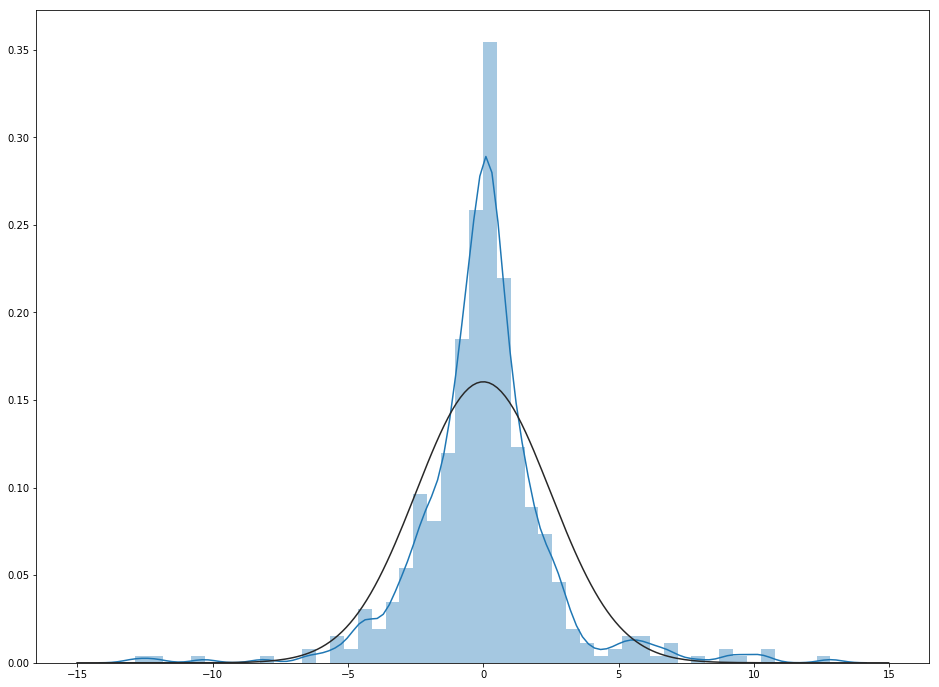

In [70]:
plt.figure(figsize=(16,12))
sns.distplot(sm_poly.fit().resid, fit=stats.norm)

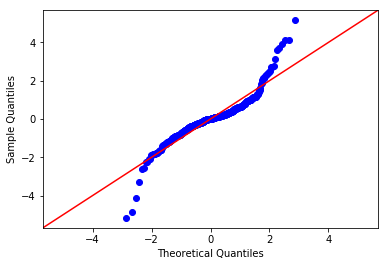

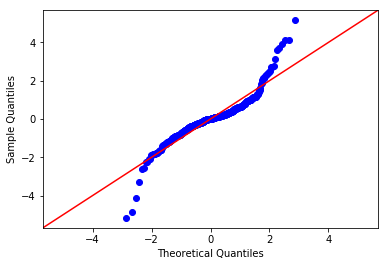

In [71]:
sm.qqplot(sm_poly.fit().resid, line='45', fit=True)

#### Better, although
* Jarque-Bera still high, suggesting non-normal distribution of residuals...
* Perhaps implement some regularisation so we can avoid the excessively high number of variables...
* Still need to deal with the problem of the ceiling.

### Adjusting for ceiling values

In [72]:
def model_test(func_df, n):
    func_df = func_df.reset_index(drop=True)
    X_func = func_df.drop(['house_value'], axis=1)
    y_func = func_df['house_value']
    func_model = Pipeline([('PCA', sklearn.decomposition.PCA()),
                           ('poly', sklearn.preprocessing.PolynomialFeatures(n)),
                           ('linear', sklearn.linear_model.LinearRegression())
                          ])
    func_model.fit(X=X_func, y=y_func)
    #y_func = func_model.predict(X=df_trans.drop(['house_value'], axis=1))
    func_pred = func_model.predict(X=X_func)
    print(f"PCA components: {func_model.named_steps['PCA'].components_}")
    print(f"PCA explained variance: {func_model.named_steps['PCA'].explained_variance_}")
    print(f"PCA explained variance ratio: {func_model.named_steps['PCA'].explained_variance_ratio_}")
    plt.figure(figsize=(16,12))
    plt.plot(func_model.named_steps['PCA'].explained_variance_)
    print(f"R^2: {func_model.score(X=X_func, y=y_func)}")
    print(f"MSE: {sklearn.metrics.mean_squared_error(func_pred, y_func)}")
    #print(f"R^2: {poly_model.score(X=df_trans.drop(['house_value'], axis=1), y=df_trans['house_value'])}")
    #print(f"MSE: {sklearn.metrics.mean_squared_error(y_func, df['house_value'])}")
    func_pca = sklearn.decomposition.PCA().fit(X_func).transform(X_func)
    func_pf = pd.DataFrame(sklearn.preprocessing.PolynomialFeatures(n).fit(func_pca).transform(func_pca))
    func_sm = sm.OLS(func_df['house_value'], func_pf)
    print(func_sm.fit().summary())
    plt.figure(figsize=(16,12))
    sns.regplot(x=func_pred, y=y_func, fit_reg=True)
    plt.figure(figsize=(16,12))
    sm.qqplot(func_sm.fit().resid, line='45', fit=True)

In [73]:
df_trunc = df_trans[df_trans['house_value'] != 50.0]
df_trunc

,crime_rate,avg_number_of_rooms,distance_to_employment_centers,property_tax_rate,pupil_teacher_ratio,house_value
0,-3.600502,6.421,4.9671,242.0,17.8,21.6
1,-3.601235,7.185,4.9671,242.0,17.8,34.7
2,-3.430523,6.998,6.0622,222.0,18.7,33.4
3,-2.672924,7.147,6.0622,222.0,18.7,36.2
4,-3.511570,6.430,6.0622,222.0,18.7,28.7
5,-2.427128,6.012,5.5605,311.0,15.2,22.9
6,-1.934130,6.172,5.9505,311.0,15.2,27.1
7,-1.554760,5.631,6.0821,311.0,15.2,16.5
8,-1.771722,6.004,6.5921,311.0,15.2,18.9
9,-1.492144,6.377,6.3467,311.0,15.2,15.0


PCA components: [[ 1.06003834e-02 -1.21634201e-03 -6.68127594e-03  9.99903344e-01
   5.90054841e-03]
 [-2.64920396e-01 -5.78497442e-02  5.76808505e-01  2.04519727e-03
   7.70557173e-01]
 [-3.48281008e-01  9.15920104e-02  6.89102300e-01  1.21184298e-02
  -6.28730791e-01]
 [-8.92995239e-01  9.74335337e-02 -4.38421832e-01  6.48803899e-03
   2.84677446e-02]
 [ 1.04712264e-01  9.89327821e-01  1.31006334e-02 -4.11961871e-04
   1.00468939e-01]]
PCA explained variance: [2.84415715e+04 3.74997206e+00 3.68023034e+00 9.24524264e-01
 4.08884365e-01]
PCA explained variance ratio: [9.99691968e-01 1.31807659e-04 1.29356309e-04 3.24960764e-05
 1.43718646e-05]
R^2: 0.9269007676432878
MSE: 6.182912346072089
                            OLS Regression Results                            
Dep. Variable:            house_value   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:            

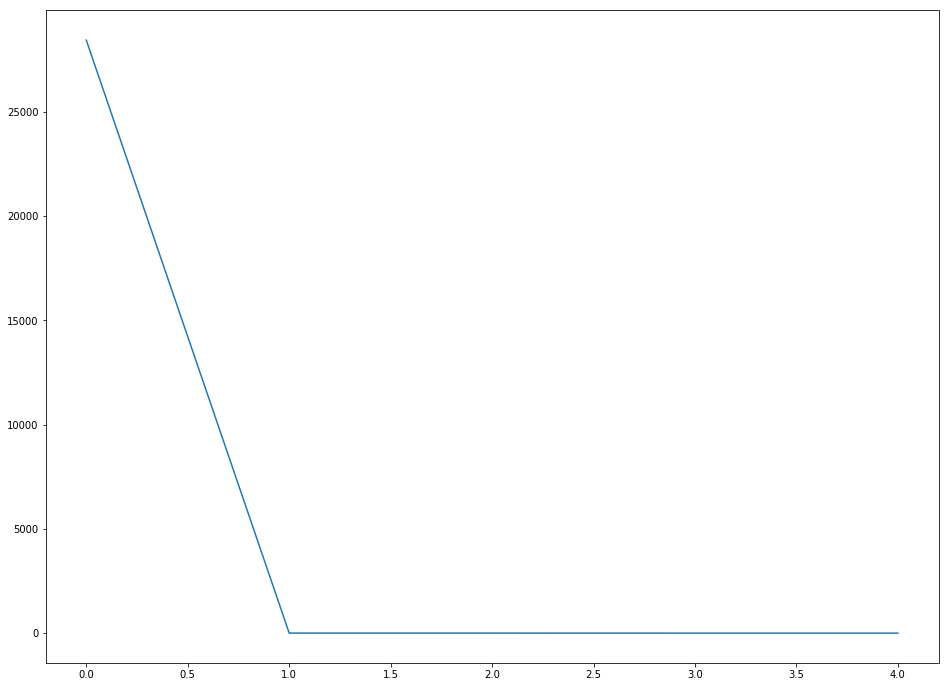

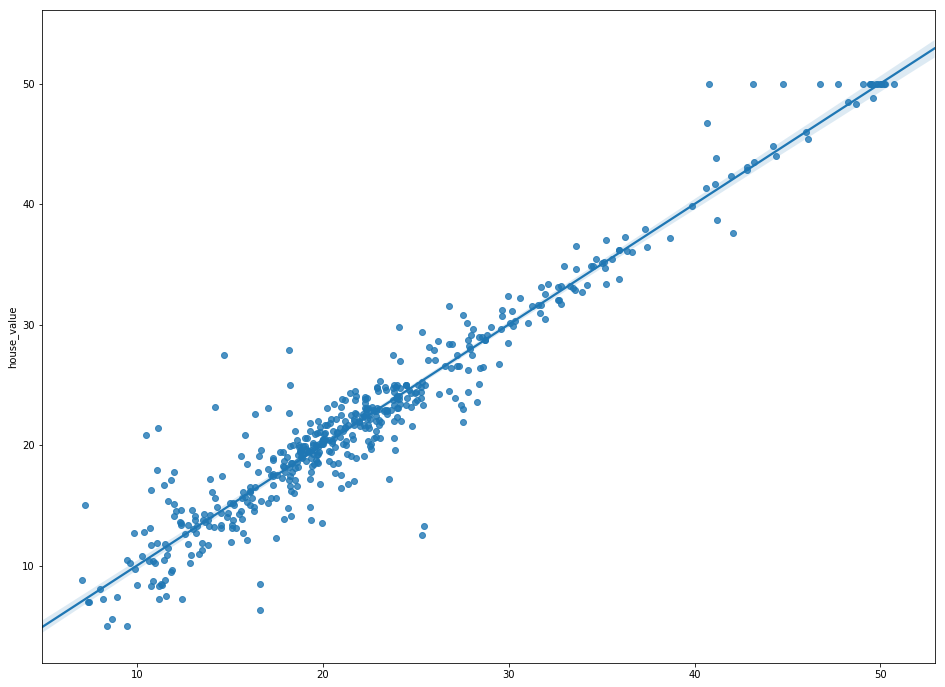

<Figure size 1152x864 with 0 Axes>

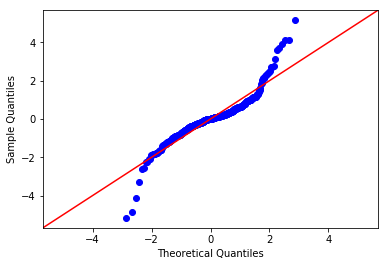

In [74]:
model_test(df_trans, 5)

In [75]:
model_test(df_trunc, 5)

SystemError: Failed to solve the system of normal equations


Oops, looks like there may be too many parameters. Maybe try a regularised version first?

#### ElasticNetCV

In [76]:
def EN_model_test(func_df, n=5, i=100):
    t1 = time.time()
    func_df = func_df.reset_index(drop=True)
    X_func = func_df.drop(['house_value'], axis=1)
    y_func = func_df['house_value']
    func_model = Pipeline([('PCA', sklearn.decomposition.PCA()),
                           ('poly', sklearn.preprocessing.PolynomialFeatures(n)),
                           ('linear', sklearn.linear_model.ElasticNetCV(l1_ratio=[x/i for x in range(1,i)],
                                                                        normalize=True,
                                                                        max_iter=100000,
                                                                        #cv=sklearn.model_selection.LeaveOneOut(),
                                                                        cv=5,
                                                                        n_jobs=-2,
                                                                       ))
                          ])
    func_model.fit(X=X_func, y=y_func)
    #y_func = func_model.predict(X=df_trans.drop(['house_value'], axis=1))
    func_pred = func_model.predict(X=X_func)
    print(f"PCA components: {func_model.named_steps['PCA'].components_}")
    print(f"PCA explained variance: {func_model.named_steps['PCA'].explained_variance_}")
    print(f"PCA explained variance ratio: {func_model.named_steps['PCA'].explained_variance_ratio_}")
    plt.figure(figsize=(16,12))
    plt.plot(func_model.named_steps['PCA'].explained_variance_)
    print(f"R^2: {func_model.score(X=X_func, y=y_func)}")
    print(f"MSE: {sklearn.metrics.mean_squared_error(func_pred, y_func)}")
    #print(f"R^2: {poly_model.score(X=df_trans.drop(['house_value'], axis=1), y=df_trans['house_value'])}")
    #print(f"MSE: {sklearn.metrics.mean_squared_error(y_func, df['house_value'])}")
    print(f"ElasticNetCV alpha: {func_model.named_steps['linear'].alpha_}")
    print(f"ElasticNetCV ratio: {func_model.named_steps['linear'].l1_ratio_}")
    print(f"ElasticNetCV alphas: {func_model.named_steps['linear'].alphas_}")
    
    func_pca = sklearn.decomposition.PCA().fit(X_func).transform(X_func)
    func_pf = pd.DataFrame(sklearn.preprocessing.PolynomialFeatures(n).fit(func_pca).transform(func_pca))
    y_trans = df_trans['house_value']
    X_trans = df_trans.drop(['house_value'], axis=1)
    trans_pred_raw = func_model.predict(X=X_trans)
    print(f"Exceeded: {sum(np.where(trans_pred_raw > 50.0, 1, 0))}")
    trans_pred = np.where(trans_pred_raw > 50.0, 50.0, trans_pred_raw)
    ss_res = sum((y_trans-trans_pred)**2)
    ss_total = sum((y_trans-np.mean(y_trans))**2)
    print(f"R^2: {1-(ss_res/ss_total)}")
    print(f"MSE: {sklearn.metrics.mean_squared_error(trans_pred, y_trans)}")
    print(f"MAE: {sklearn.metrics.mean_absolute_error(trans_pred, y_trans)}")
    plt.figure(figsize=(16,12))
    sns.distplot(y_trans-trans_pred, fit=stats.norm).set_title("Histogram of errors in full dataset")
    plt.figure(figsize=(16,12))
    sns.regplot(x=trans_pred, y=y_trans, fit_reg=True).set_title("Full dataset: Actual vs predicted")
    plt.figure(figsize=(16,12))
    sns.distplot(trans_pred, fit=stats.norm).set_title("Histogram of predictions in full dataset")
    print(f"Elapsed time: {time.time()-t1}")

PCA components: [[ 1.06003834e-02 -1.21634201e-03 -6.68127594e-03  9.99903344e-01
   5.90054841e-03]
 [-2.64920396e-01 -5.78497442e-02  5.76808505e-01  2.04519727e-03
   7.70557173e-01]
 [-3.48281008e-01  9.15920104e-02  6.89102300e-01  1.21184298e-02
  -6.28730791e-01]
 [-8.92995239e-01  9.74335337e-02 -4.38421832e-01  6.48803899e-03
   2.84677446e-02]
 [ 1.04712264e-01  9.89327821e-01  1.31006334e-02 -4.11961871e-04
   1.00468939e-01]]
PCA explained variance: [2.84415715e+04 3.74997206e+00 3.68023034e+00 9.24524264e-01
 4.08884365e-01]
PCA explained variance ratio: [9.99691968e-01 1.31807659e-04 1.29356309e-04 3.24960764e-05
 1.43718646e-05]
R^2: 0.47446103250470384
MSE: 44.45137473690971
ElasticNetCV alpha: 0.015074804290521588
ElasticNetCV ratio: 0.02
ElasticNetCV alphas: [[1.98364292e+01 1.84995203e+01 1.72527145e+01 ... 2.28070732e-02
  2.12699528e-02 1.98364292e-02]
 [9.91821460e+00 9.24976013e+00 8.62635725e+00 ... 1.14035366e-02
  1.06349764e-02 9.91821460e-03]
 [6.61214307e+0

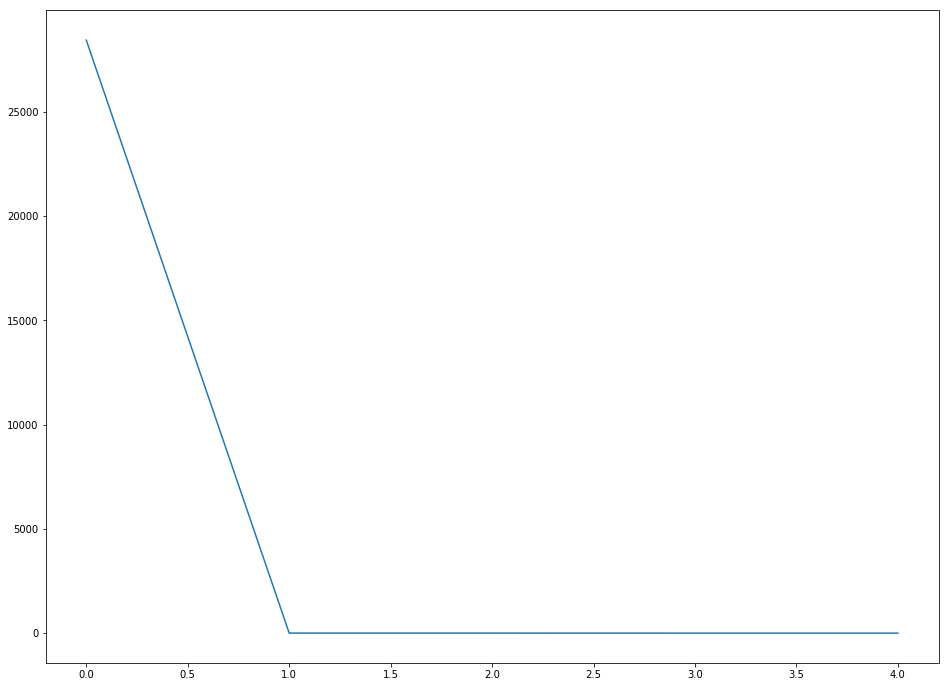

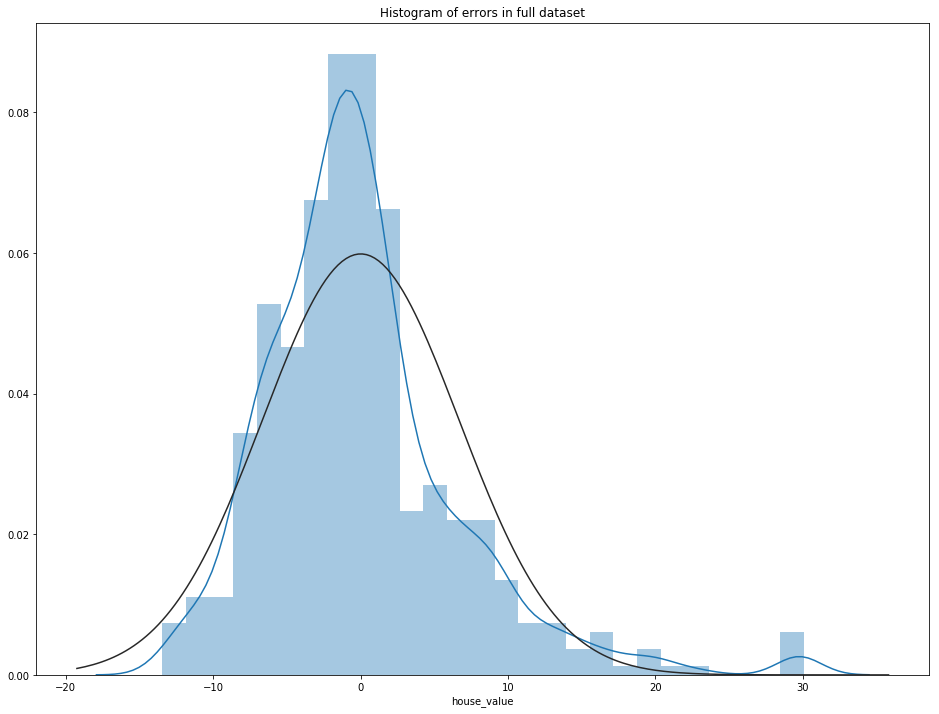

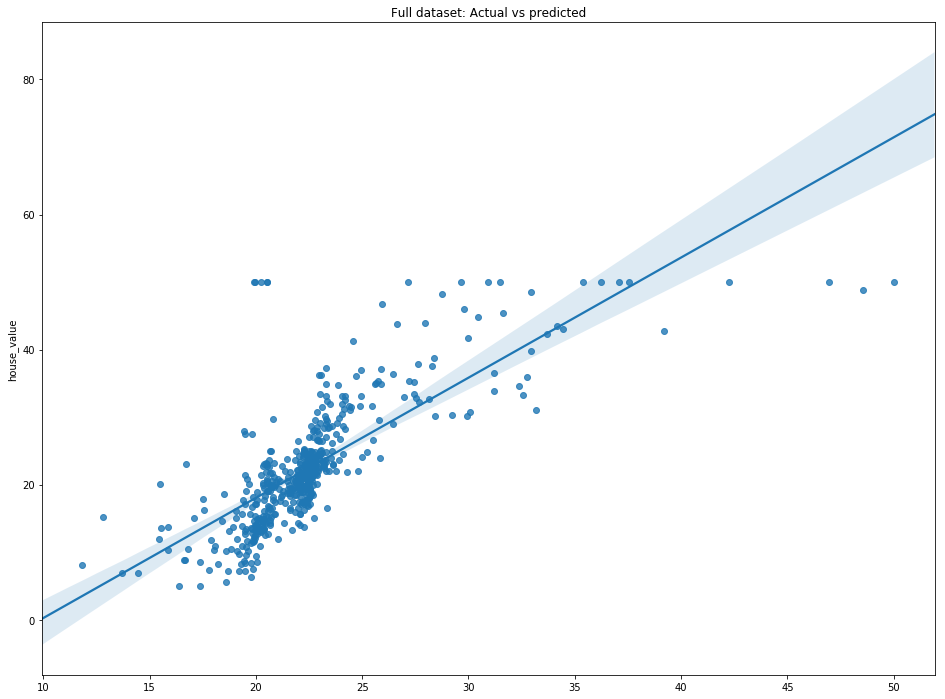

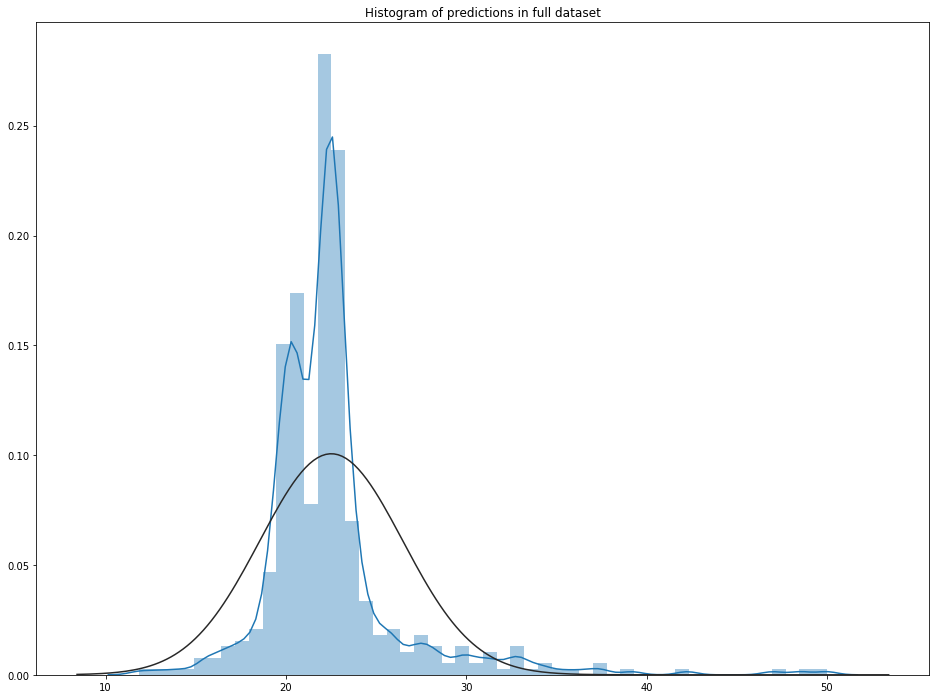

In [77]:
EN_model_test(df_trans, 5)

PCA components: [[ 1.06011651e-02 -1.09410932e-03 -6.68376354e-03  9.99904860e-01
   5.65835064e-03]
 [-4.12020101e-01  7.19047977e-02  8.43976541e-01  1.19876015e-02
  -3.35602492e-01]
 [-1.28598611e-01 -4.96727219e-02  3.14890768e-01 -1.90011298e-03
   9.39060814e-01]
 [-8.95501757e-01  9.36565643e-02 -4.34146434e-01  6.53677465e-03
   2.79140804e-02]
 [ 1.08009503e-01  9.91760844e-01 -4.42760998e-03 -4.78498901e-04
   6.87353108e-02]]
PCA explained variance: [2.82834114e+04 3.74848922e+00 3.52874365e+00 9.41372027e-01
 3.63007440e-01]
PCA explained variance ratio: [9.99696677e-01 1.32492936e-04 1.24725877e-04 3.32734433e-05
 1.28307482e-05]
R^2: 0.8625808066390248
MSE: 8.499584369433297
ElasticNetCV alpha: 0.002364173937986587
ElasticNetCV ratio: 0.99
ElasticNetCV alphas: [[2.03567555e+01 1.89847783e+01 1.77052678e+01 ... 2.34053220e-02
  2.18278816e-02 2.03567555e-02]
 [1.01783777e+01 9.49238913e+00 8.85263388e+00 ... 1.17026610e-02
  1.09139408e-02 1.01783777e-02]
 [6.78558515e+00

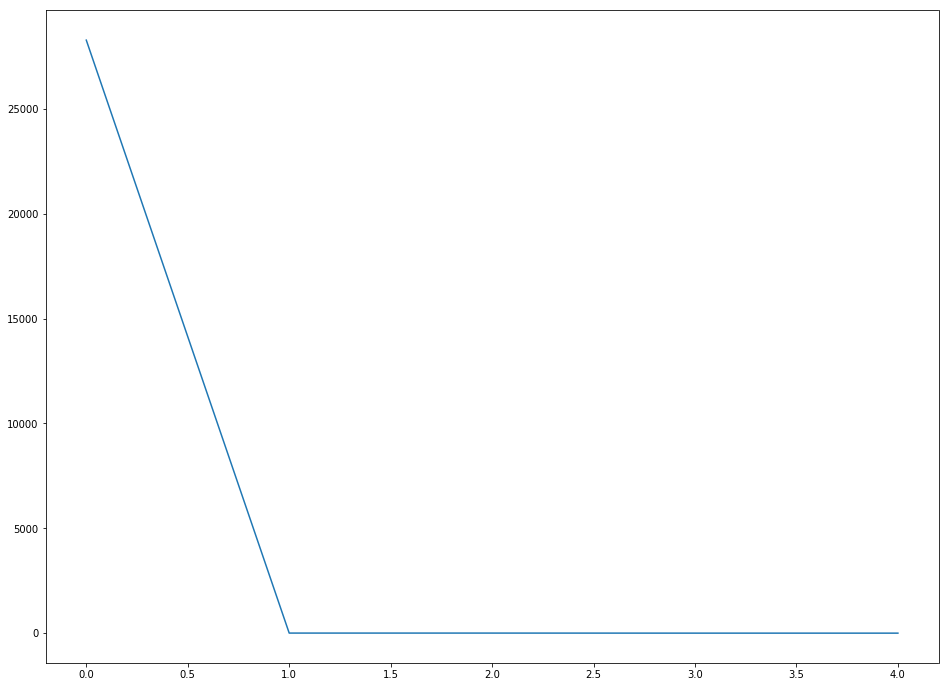

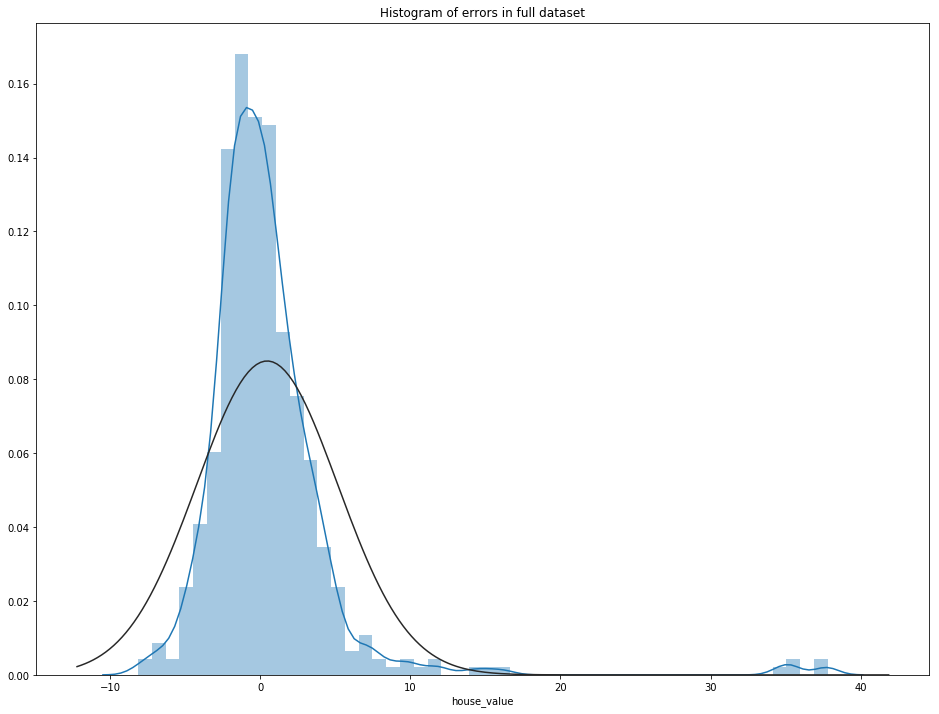

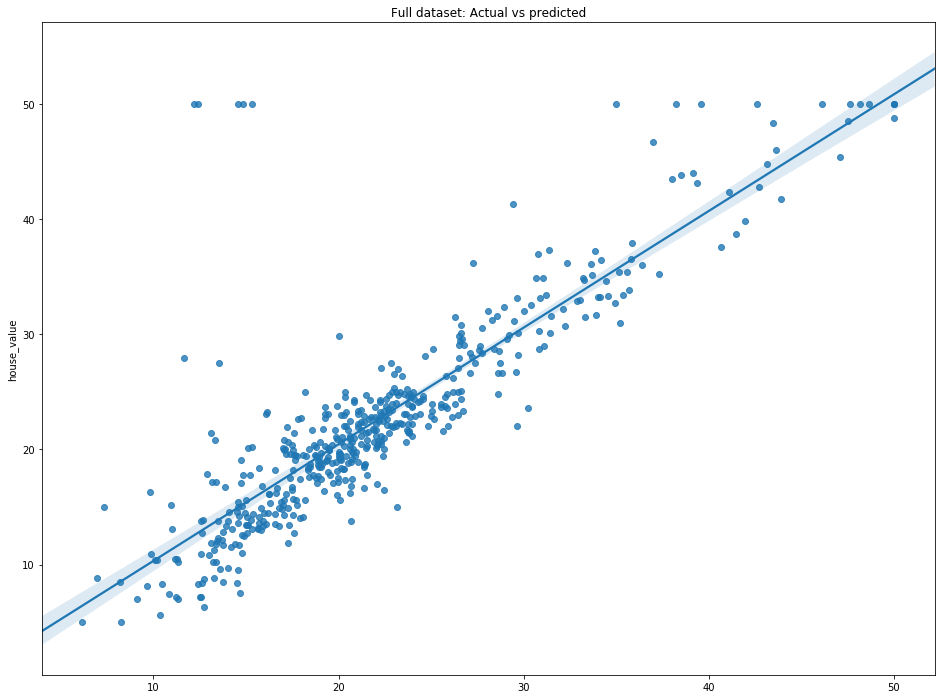

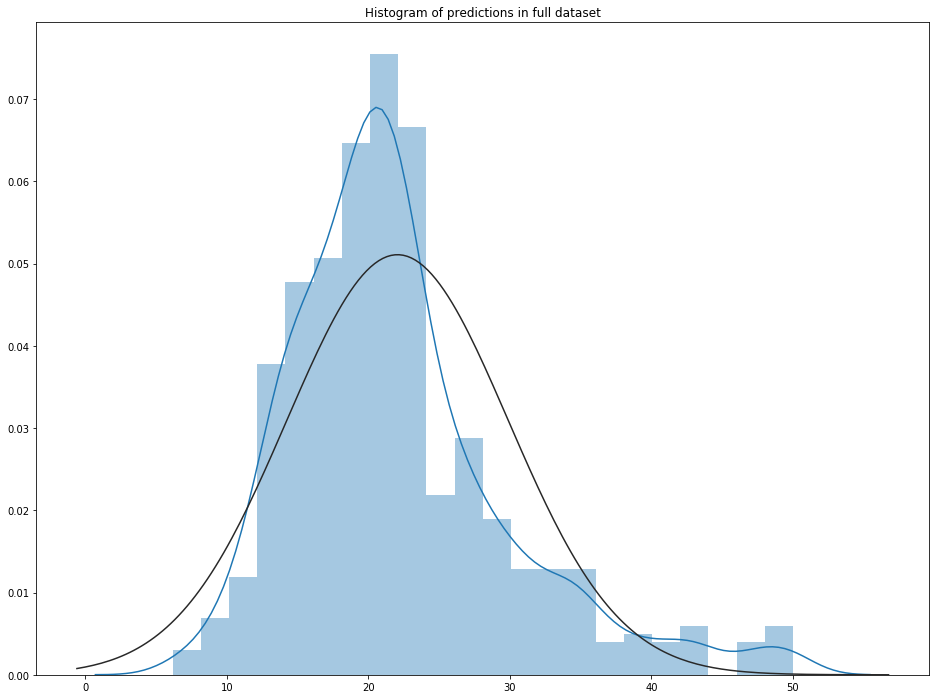

In [78]:
EN_model_test(df_trunc, 5)

In [ ]:
df_classifier = df_trans.copy(deep=True)
df_classifier['target'] = np.where(df_classifier['house_value'] < 50.0, 0, 1)
sum(df_classifier['target'])

In [ ]:
logistic_classifier = (sklearn.linear_model.LogisticRegressionCV(cv=5)
                       .fit(df_classifier.drop(['house_value', 'target'], axis=1),
                           df_classifier['target']
                           ))
print(logistic_classifier.score(df_classifier.drop(['house_value', 'target'], axis=1),
                          df_classifier['target']))
logistic_pred = logistic_classifier.predict(df_classifier.drop(['house_value', 'target'], axis=1))
print(logistic_pred)
sns.regplot(x=df_classifier['house_value'], y=logistic_pred, fit_reg=True)

In [ ]:
df_classifier = df_poly.copy(deep=True)
df_classifier['target'] = np.where(df_trans['house_value'] < 50.0, 0, 1)
sum(df_classifier['target'])

In [ ]:
logistic_classifier = (sklearn.linear_model.LogisticRegressionCV(cv=5)
                       .fit(df_classifier.drop(['target'], axis=1),
                           df_classifier['target']
                           ))
print(logistic_classifier.score(df_classifier.drop(['target'], axis=1),
                          df_classifier['target']))
logistic_pred = logistic_classifier.predict(df_classifier.drop(['target'], axis=1))
print(logistic_pred)
sns.regplot(x=df_trans['house_value'], y=logistic_pred, fit_reg=True)